



# Run these cells to install legwork and import necessary modules

In [ ]:
!pip install legwork


In [ ]:
# importing some important legwork module plus some general modules
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#general modules to import
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import matplotlib as mpl

#importing legwork module
import legwork as lw

# Check if it successfully imported
print(f"LEGWORK version: {lw.__version__}")

#ensure we all get the same anwsers even with randomized answers
np.random.seed(3)



LEGWORK version: 0.5.2


# LEGWORK - A Primer

This tutorial aims to be a general overview of LEGWORK and its capabilities.

This notebook is heavily inspired by the demos and tutorials on [LEGWORK Documentation](https://legwork.readthedocs.io/en/latest/index.html)

<br/>

---


# Outline:
The goal of this notebook is to have an understanding of how to:

* Understand what LEGWORK is, what it can do(at least generally), and why you should use it!
* Building a Binary
* Calculating the strain and signal-to-noise ratio(SNR)
* Get a sense of how flexible it is.

Bonus Goals:

* PSDs
* Evolving your Binaries


<br/>



# General Overview of LEGWORK

## What is it?

![LEGWORK what is it?](https://drive.google.com/uc?export=download&id=1LSsBnyPVIrChWqx4RYp1cKr6ZcnTEpJ4)


**Essentially…​**

LEGWORK is a tool that is able to calculate the detectability of compact objects, evolve and visualize the results.


<br/>

---

<br/>

## Packages within LEGWORK Overvew

Figure 1 from LEGWORK main paper [Wagg et. al 2022](https://ui.adsabs.harvard.edu/abs/2022ApJS..260...52W/abstract) illustrating the module structure and descriptions of each module. The arrows show how the modules are related.


![LEGWORK module structure?](https://drive.google.com/uc?export=download&id=159HXrnDPhM3XonbELTga-lj8CGYkt7fS)


As illustrated from the above LEGWORK can:
* Calculate the signal-to-noise(SNR) for compact binary systems as well as strain
* Model binary evolution

<br/>

Plus other key features such as:
* Includes circular and eccentric orbits
* Analyze single binary and a population of binaries
* Very flexible with what you can input




---



---


# Before we begin: Units in LEGWORK
LEGWORK heavily depends on astropy units as inputs for it's various functions. Without giving units, LEGWORK is likely to run into issues or not perform calculations correctly.

Here are some relavant links:

*   [Astropy units](https://docs.astropy.org/en/stable/units/index.html)
*   [LEGWORK units](https://legwork.readthedocs.io/en/latest/notebooks/Units.html?highlight=units)

<br/>

**BUT** the general gist of it from the documentation is:
![LEGWORK units](https://drive.google.com/uc?export=download&id=1cCccXZTZwWcEhxIVfie_pWg5hZUCQQGp)

**Note:** if you want to remove astropy units you can use `.value` at the end of your variable.


---



---








# Compact Object Binaries

The goal within this section is to use the `Sources` module to define your own compact binaries.

## Making a Simple Binary

Starting with a simple 30-30 $\mathrm{M}_\odot$ circular binary.

**Note:**
When generating a binary the mandatory parameters you need are:

*   Mass 1: `m_1`
*   Mass 2: `m_2`
*   Eccentricity: `ecc`
*   Distance: `dist`

<br/>

"Optional" parmaters(By optional I mean you must have one **or** the other):
*   Semi-major axis: `a`
*   Orbital Frequency: `f_orb`

More information about source module
[LEGWORK Source module documentation](https://legwork.readthedocs.io/en/latest/notebooks/Source.html)


## Step by step guide to building a binary and calculating when it will merge.

In [ ]:

# Example of how to create as simple binary using the source module.

# Setting your parameters
m1 = 30 * u.Msun
m2 = 30 * u.Msun
ecc = 0.0
f_orb = 1e-4 * u.Hz
dist = 8 * u.kpc

simple_source = lw.source.Source(m_1=m1, # Primary source mass
                          m_2=m2, # secondary mass
                          ecc=ecc, # eccentricity
                          f_orb=f_orb, #orbital frequency
                          dist=dist, # Distance
                          interpolate_g=False)


# Printing merger time
print(f"When does this binary merge in Gyr:{simple_source.get_merger_time()}")
print(f"When does this binary merge in Myr:{simple_source.get_merger_time().to(u.Myr)}") #like astropy you can use the same method to convert units

# Other parameters of the binary
print(f"Semi-major axis: {simple_source.a}")
print(f"Chirp mass: {simple_source.m_c}")





When does this binary merge in Gyr:[0.00065194] Gyr
When does this binary merge in Myr:[0.65193624] Myr
Semi-major axis: [0.01819599] AU
Chirp mass: [26.1165169] solMass


### **Task 1:**
Build a binary from total mass and mass ratio and calculate the merger time.

In [ ]:
# Heres a function that may help
def create_binary(mass1, mass2, eccentricity = 0.0, orbital_frequency = 1e-4 * u.Hz, distance=8 * u.kpc):
  """Function to create a binary in LEGWORK"""

  source = lw.source.Source(m_1=mass1, # Primary source mass
                            m_2=mass2, # secondary mass
                            ecc=eccentricity, # eccentricity
                            f_orb=orbital_frequency, #orbital frequency
                            dist=distance, # Distance
                            interpolate_g=False)
  return source

In [ ]:
 #Task 1

# Example of how to create as simple binary using the source module.
total_mass = 60 #total_mass = m1+m2
q = 0.7 #q = m2/m1

#uncomment the two lines and fill out the blanks for m1 and m2
#m1_task1 = ___ * u.Msun
#m2_task1 = ___ * u.Msun


#source_task1 = create_binary(m1_task1, m2_task1)

#print(f"When does this binary merge:{source_task1.get_merger_time()}")




---

Krystal's Version

---



In [ ]:
# Example of how to create as simple binary using the source module.
total_mass = 50
q = 0.7

#converting total mass and mass ratio to m1 and m2
m1_task1 = total_mass * q / (1. + q) * u.Msun
m2_task1 = total_mass * 1 / (1. + q) * u.Msun

print(f"Mass 1 = {m1_task1}")
print(f"Mass 2 = {m2_task1}")


source_task1 = create_binary(m1_task1, m2_task1) # creating a binary

print(f"When does this binary merge:{source_task1.get_merger_time()}")



Mass 1 = 20.58823529411765 solMass
Mass 2 = 29.411764705882355 solMass
When does this binary merge:[0.00091183] Gyr


## Now what if you want a population?

LEGWORK has the capability to make calculations for multiple binaries rather than just a single binary.


In [ ]:
# Example: Create a population of binaries

number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = np.random.uniform(0, 30, number_binaries) * u.Msun
dist = np.random.normal(8, 1.5, number_binaries) * u.kpc
f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz
print(f"Range of orbital frequencies:{f_orb.min()} - {f_orb.max()}")

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources = create_binary(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")




Range of orbital frequencies:1.0031534710097415e-05 Hz - 0.43285474151179476 Hz
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr




---
---


# Detectability: SNR and Strain

Now that we have a gravitational wave source(s). How do we find out how detectable these binaries are.


---



## Calculating SNR

One way to evaluate how detectable a binary is by a given detector is by calculating it's **SNR**. SNR tells us how **loud** the gravitational waves from a binary are in comparison to the noise of the chosen detector.


---

<br/>

### For LISA, the SNR calculation in LEGWORK depends on:
*   Distance from source to detector(luminosity distance)
*   Sky position
*   Orientation of the source (inclination, polarization)
*   Direction of source to the detector


---

<br/>

## In our Case
Earlier in the notebook we stuck to simpler cases that only included **luminosity distance** rather than including the other parameters. In this case, LEGWORK averages over position, polarisation, and orientation of the binary to calculate the SNR.


If you wanted to include some or all of the parameters listed above into your binary. Here is useful documentation to do so [`source` documentation](https://legwork.readthedocs.io/en/latest/api/legwork.source.Source.html?).

If you want to look at the math, see the [LEGWORK SNR]() under the "Signal-to-Noise Ratios for a 6-link(3-arm)LISA" section for a full overview.



---

<br/>

We calculate SNR for our sources below to illustrate the general method.

**Note:** By default the SNR is calculated for a **4 year LISA mission**.


In [ ]:
# What is the SNR for our single binary?
print(f"SNR of simple binary = {simple_source.get_snr()}")


print(f"SNR of our task 1 binary = {source_task1.get_snr()} ")

SNR of simple binary = [17.48274152]
SNR of our task 1 binary = [12.49974007] 


In [ ]:
# What is the SNR for our population?

print(f"Range of SNR: {pop_sources.get_snr().min()} - {pop_sources.get_snr().max()}")


Range of SNR: 1.0446833718841625e-06 - 241651.68925314196




---

To learn out more about your population. Add `verbose = True` when calling


`get_snr()`

<br/>

This will tell us:
 how many sources are stationary - take a long time to merge or evolving -take

*   How many sources are **evolving vs. stationary**
*   How many are **eccentric vs. circular**
*   How many **merged** during the observation time.

<br/>

## In our case, we expect:
*   All sources are **circular**, which is is expected since we set our eccentricity to 0
*   Sources that are **stationary** and a few that are **evolving**




---

<br/>

## Questions

*  How many stationary do we see in comparison to evolving. Why could this be the case?

*  Is what is reflected in the print out shown below in the plot?

Hint: plot frequency/seperation histogram



In [ ]:
print(f"SNR of population = {pop_sources.get_snr(verbose = True)}")

Calculating SNR for 2000 sources
	0 sources have already merged
	1764 sources are stationary
		1764 sources are stationary and circular
	236 sources are evolving
		236 sources are evolving and circular
SNR of population = [6.89154019e-02 1.71496357e+03 1.10870669e-03 ... 9.20035605e-02
 5.56362858e-03 4.59122285e+04]


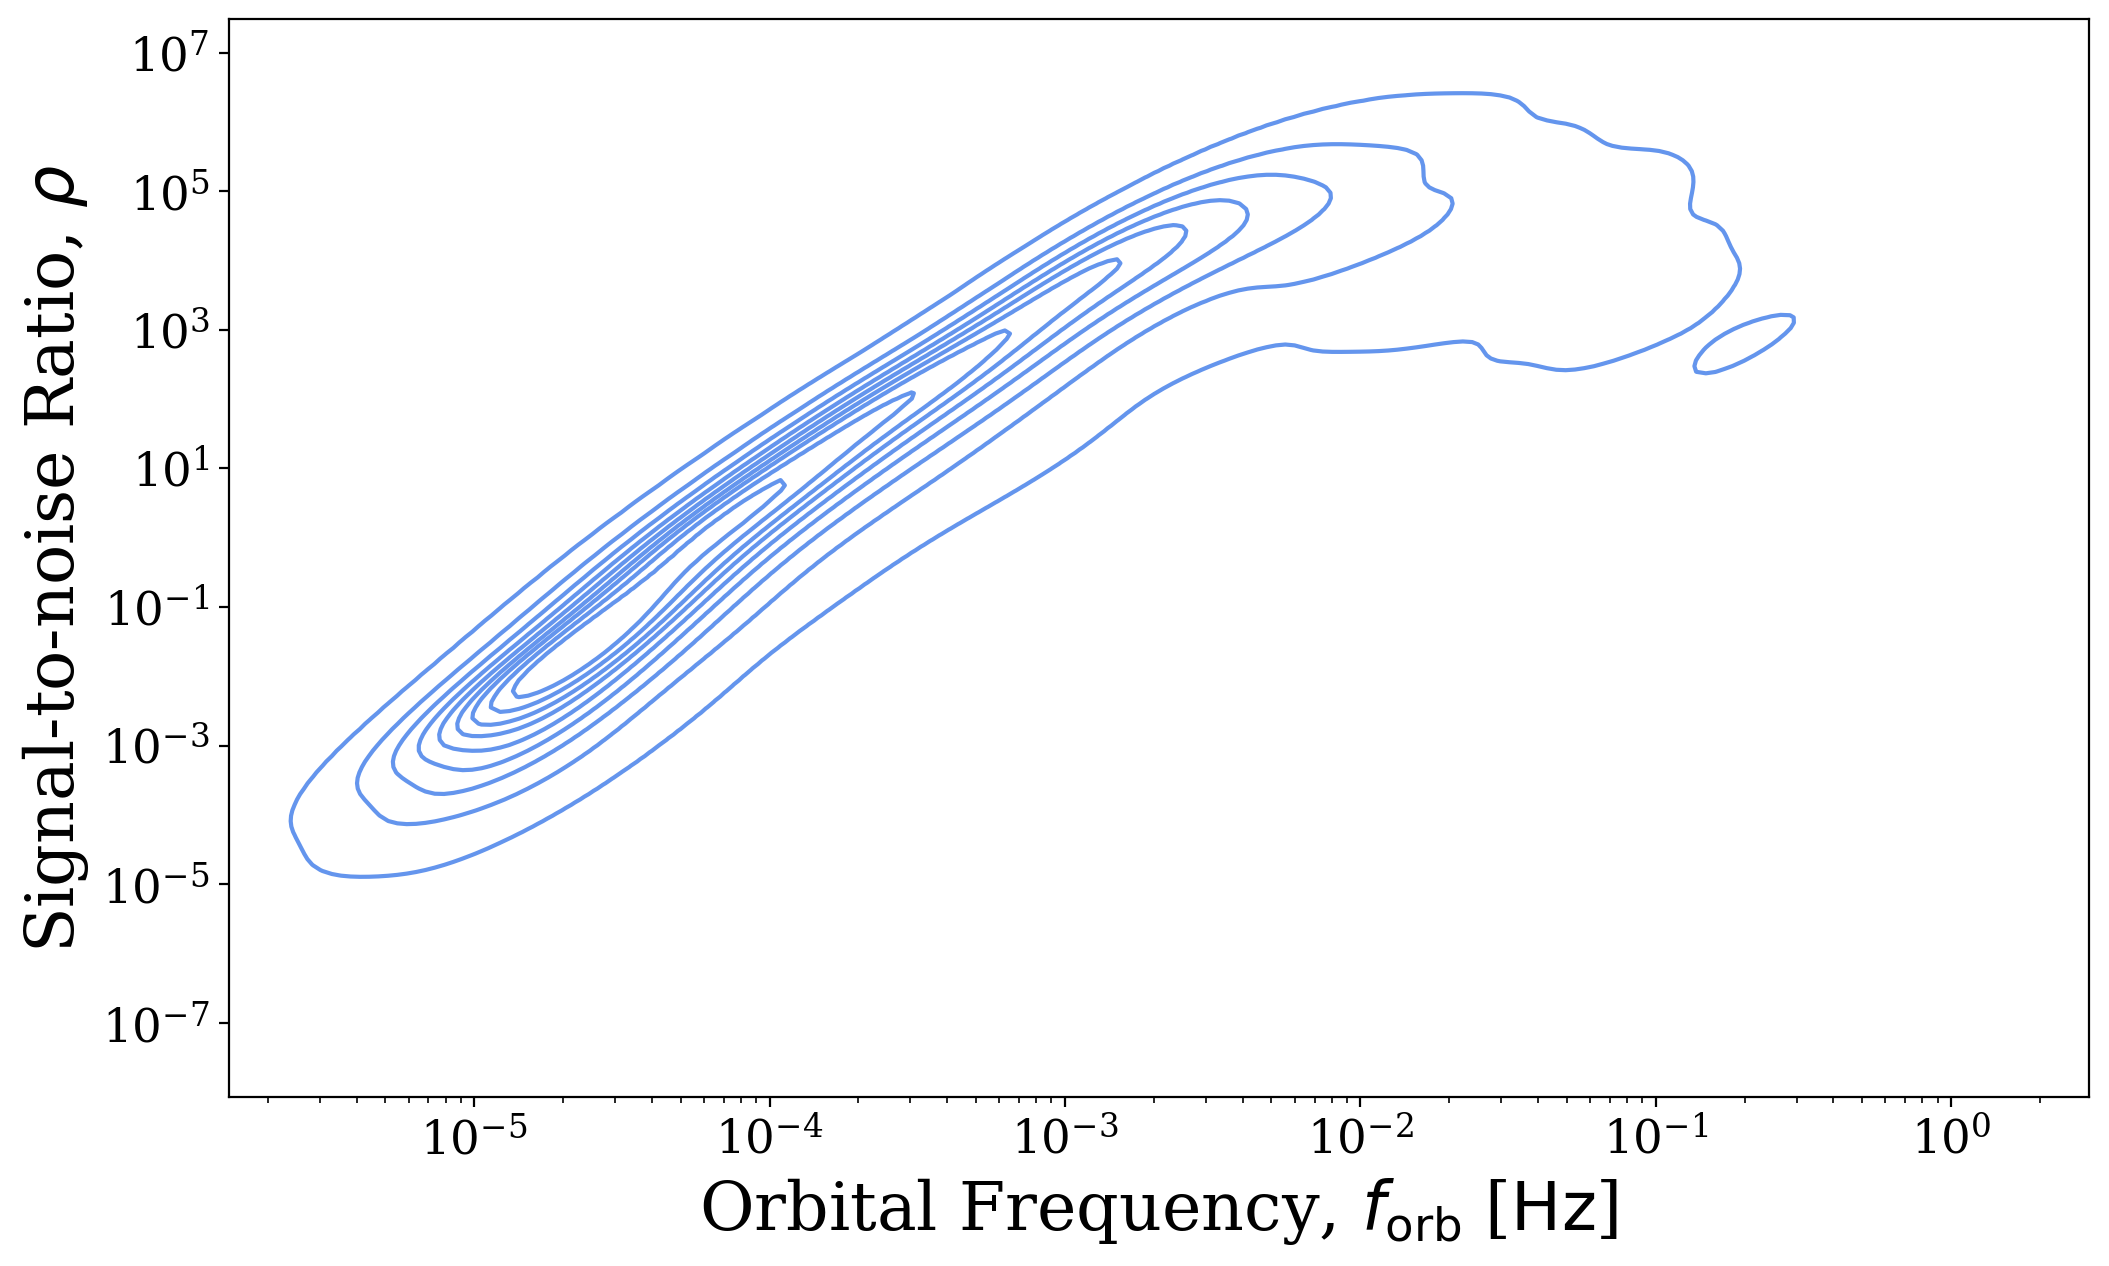

In [ ]:
#plotting our population

fig, ax = pop_sources.plot_source_variables(xstr="f_orb", ystr="snr",disttype="kde", log_scale=(True, True), color = 'cornflowerblue')





---


## Characteristic Strain vs Strain Amplitude -- BONUS

### Other tools we can use to measure detectability:

First is **characteristic strain(`h_c`)**, which represent the **accumulated signal** over the mission time. It is nice to use because it incorporates the duration of the signal across frequecies.

In this case, the **SNR**  can be seen visually as just the **area** between the characteristic strain curve and the noise curve of the detector.


There is also **strain amplitude(`h`)**, which is the instantaneous measurement of the signal of the GW. LEGWORK calculates this at the starting frequency.



## For more detailed explainations
[Christopher Berry's Blog](https://cplberry.com/2015/01/10/1408-0740/)

[GW Sensitivity Curves](https://arxiv.org/pdf/1408.0740)


---

<br/>

The following code box calculates the characteristic strain and strain amplitude for a binary.


**Note:** n=2 refers to harmonics which we wont go over in this notebook.






In [ ]:
mc = 30 * u.Msun #Chirp mass

ecc = 0.0
f_orb = 1e-4 * u.Hz
dist = 8 * u.kpc

# Calculating Characteristic Strain
h_c_2 = lw.strain.h_c_n(m_c=mc, f_orb=f_orb, ecc=ecc, n=2, dist=dist).flatten() #flattening array - full array has the shape(# of sources, # of timesteps, # of harmonics)


# Calculating Strain Amplitude
h_0_2 = lw.strain.h_0_n(m_c=mc, f_orb=f_orb, ecc=ecc,n=2, dist=dist).flatten()

print("Note the difference:")
print(f"Characteristic Strain = {h_c_2}")
print(f"Strain Amplitude = {h_0_2}")



Note the difference:
Characteristic Strain = [1.2284909e-15]
Strain Amplitude = [1.31640554e-20]




### **Task 2:**

Now show the differnce between Strain Amplitude and Characteristic Stain for a of frequencies (perhaps LISA's frequency range) and plot them.

**Bonus:** Can you explain the difference? [LEGWORK Derivations](https://legwork.readthedocs.io/en/latest/notebooks/Derivations.html)



In [ ]:
m1_task2 = 30 * u.Msun
m2_task2 = 30 * u.Msun


# Find the chirp mass
#Hint: chirp mass https://en.wikipedia.org/wiki/Chirp_mass
#mc_task2 =___


#f_orb_task2  = ____ # you can use the array from earlier for orbital frequency



# Calculating Characteristic Strain
#char_strain_task2  = lw.strain.h_c_n(m_c=mc_task2 , f_orb= f_orb_task2, ecc=0.0 , n=2, dist= 8*u.kpc).flatten()


# Calculating Strain Amplitude
#strain_amp_task2  = lw.strain.h_0_n(m_c=mc_task2 , f_orb=f_orb_task2, ecc=0.0 , n=2, dist=8*u.kpc).flatten()


#plot char strain vs strain amplitude!!









---

Krystal's Version

---



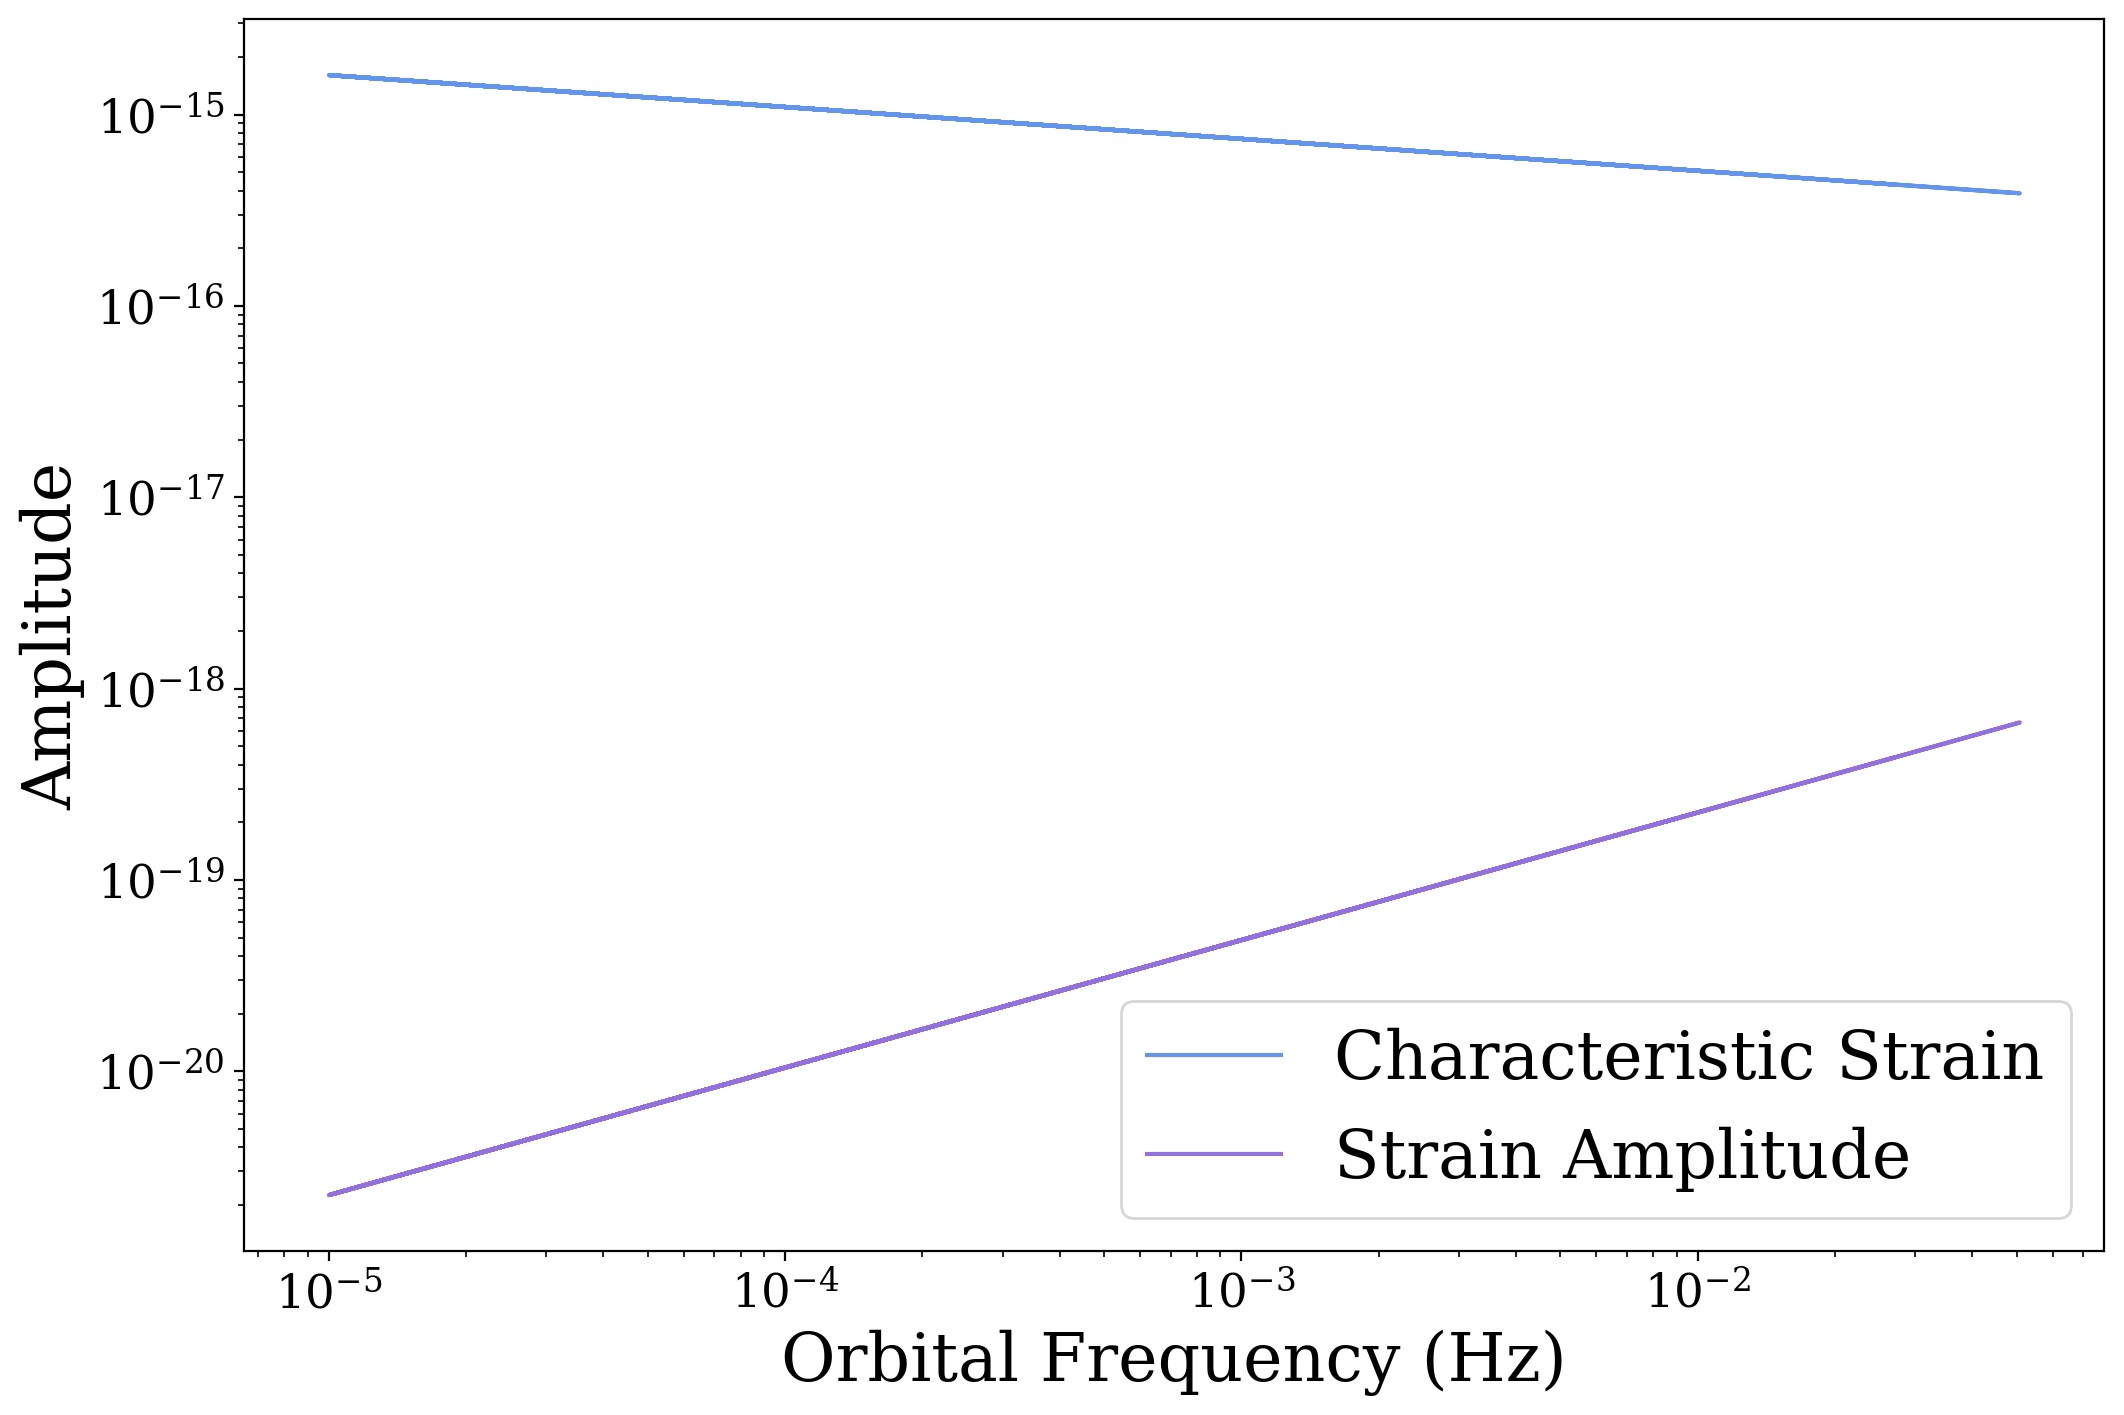

In [ ]:

m1_task2  = 30 * u.Msun
m2_task2  = 30 * u.Msun


f_orb_task2  = 10**(-5 * np.random.power(3, 100)) * u.Hz


mc_task2  = (m1 * m2)**(3/5) / (m1 + m2)**(1/5)

# Calculating Characteristic Strain
char_strain_task2  = lw.strain.h_c_n(m_c=mc_task2, f_orb= f_orb_task2, ecc=0.0 , n=2, dist= 8*u.kpc).flatten()


# Calculating Strain Amplitude
strain_amp_task2  = lw.strain.h_0_n(m_c=mc_task2 , f_orb=f_orb_task2, ecc=0.0 , n=2, dist=8*u.kpc).flatten()




plt.loglog(f_orb_task2, char_strain_task2, c = 'cornflowerblue', label = 'Characteristic Strain')
plt.loglog(f_orb_task2, strain_amp_task2, c = 'mediumpurple',  label = 'Strain Amplitude')
plt.legend()
plt.xlabel('Orbital Frequency (Hz)')
plt.ylabel('Amplitude')
plt.show()



## Returning to our population. Let's overlay the LISA's Amplitude Spectral Density

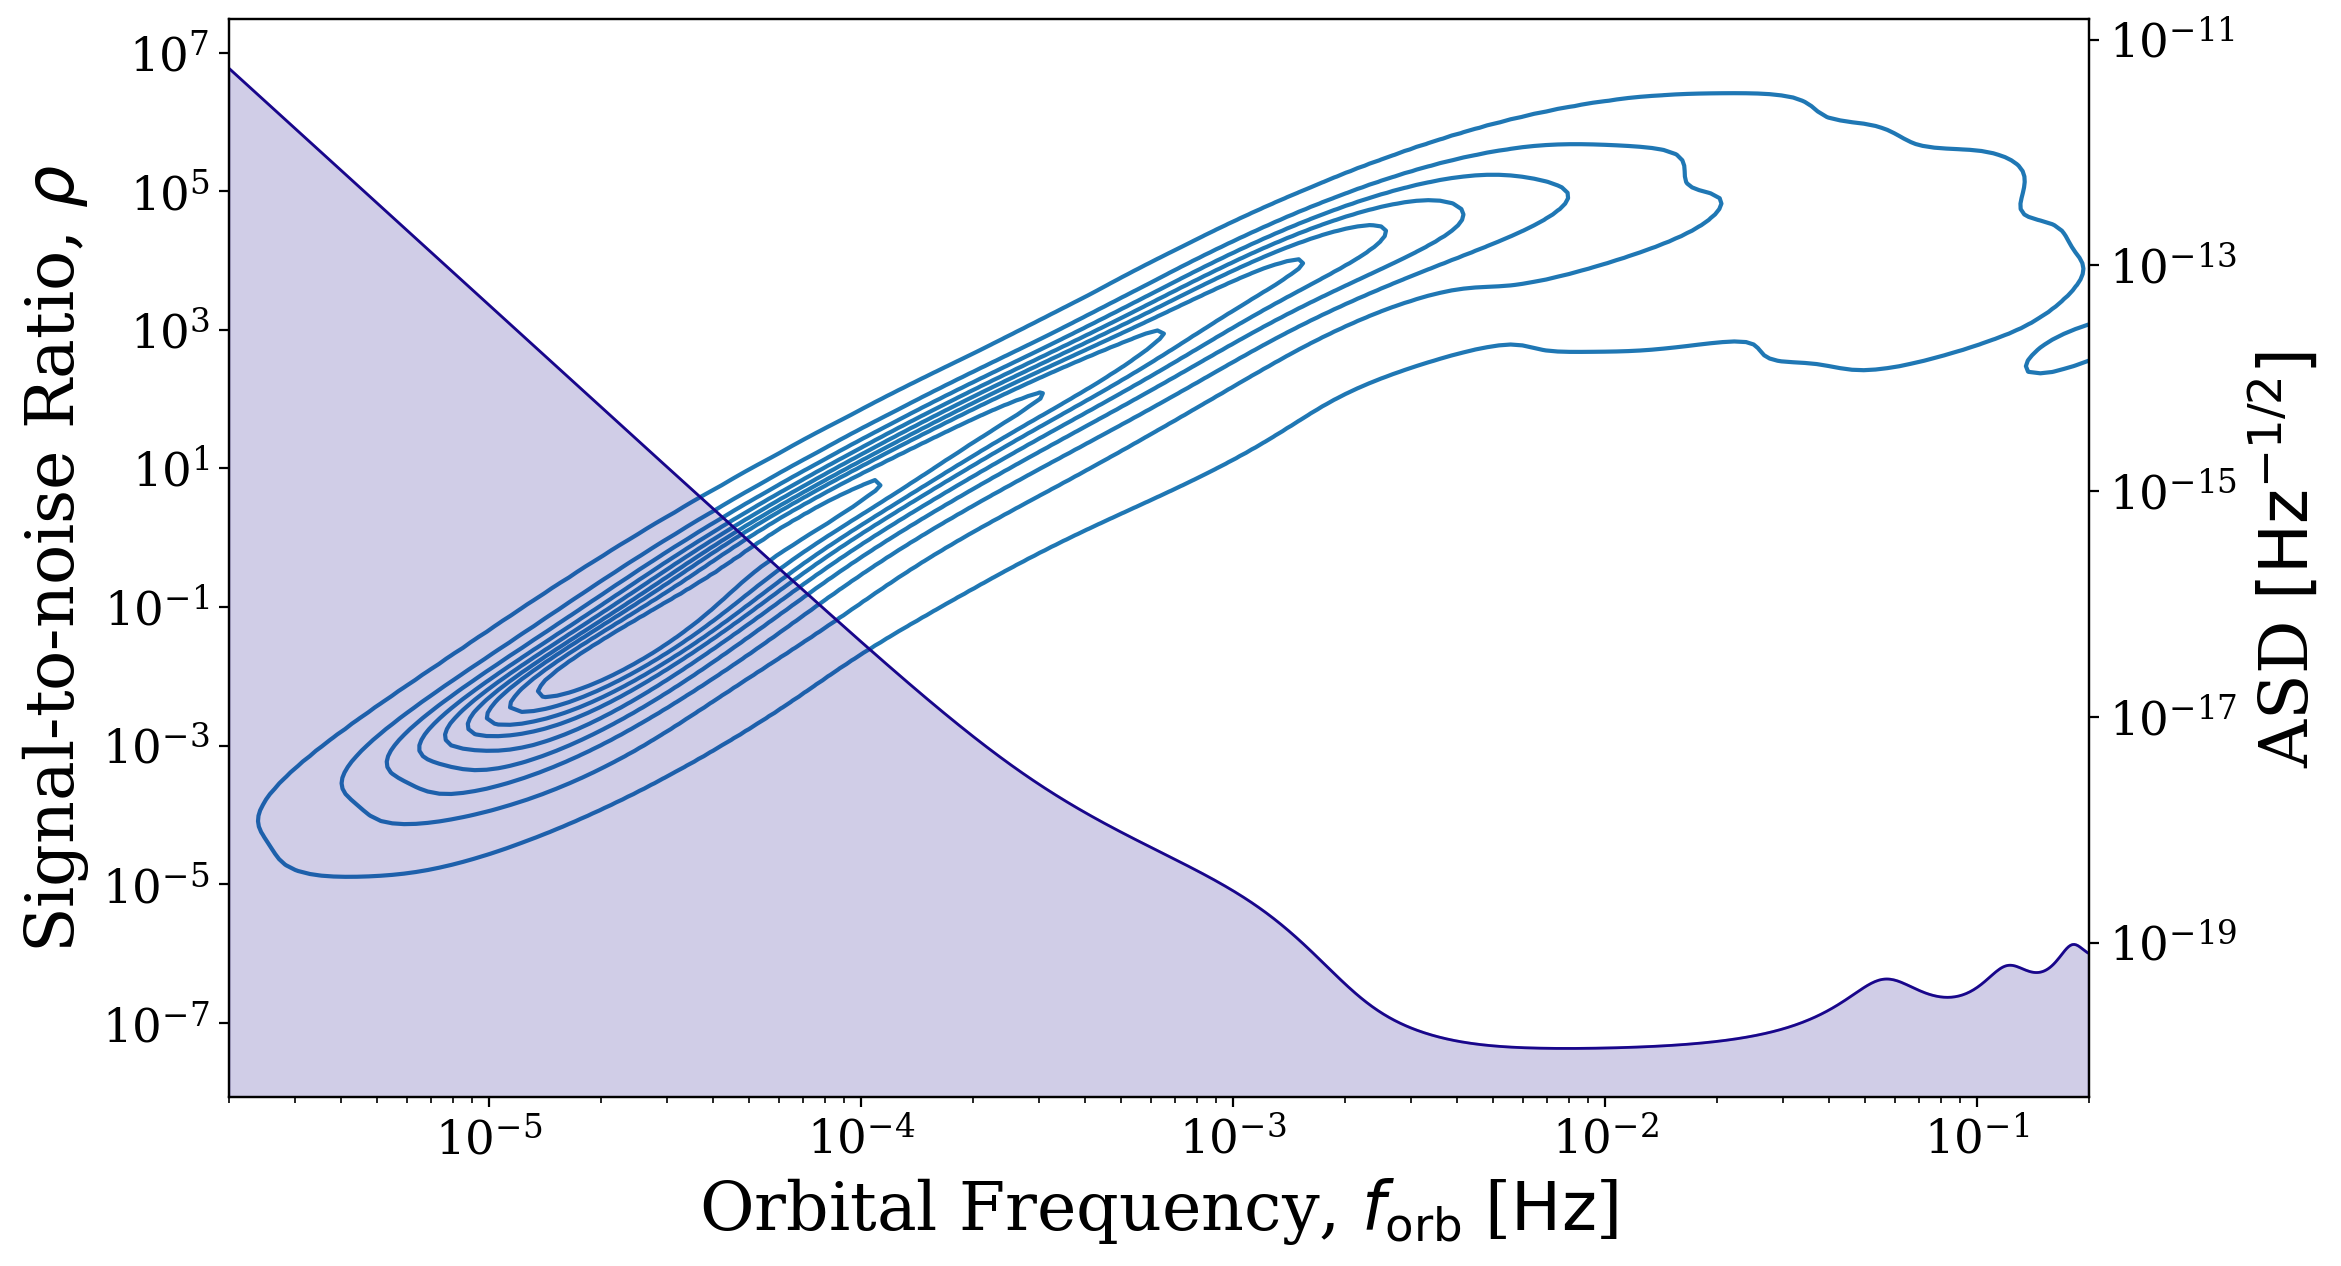

(<Figure size 1200x700 with 2 Axes>,
 <Axes: xlabel='Frequency [$\\rm Hz$]', ylabel='ASD $[\\rm Hz^{-1/2}]$'>)

In [ ]:
fig, ax = pop_sources.plot_source_variables(xstr="f_orb", ystr="snr", disttype="kde", log_scale=(True, True),
                                        fill=False, show=False)

# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

### **Task 3:**

Throught this notebook we always chose a very simple low mass binary.
*   30 - 30 $M_\odot$ binary
*   normal distribution for distance around 8 kpc
*   no eccentricity

How do things change when:

*   **Distance change**
 -  LMC (~50 kpc)
 -  VIRGO (~16 Mpc)


*   **Exploring a different mass range.**
 -  WD population
 -  Stellar - origin black hole population
 -  Intermediate Mass Population
 -  Supermassive Black Holes


*   **How about exploring eccentric orbits**
 - 0.5
 - 0.8













Here is a function to help make things easier. I set to plot the sources as default with `plot=True` in the `population` function, but feel free to turn plotting off by setting `plot=False`.

In [ ]:
def population(mass1, mass2, eccentricity, distance, orbital_frequency, plot = True):
  """Here is a function to play with. Just input your own parameters"""


  pop_sources = lw.source.Source(m_1=mass1, # Primary source mass
                              m_2=mass2,
                              ecc=eccentricity,
                              dist=distance,
                              f_orb=orbital_frequency,
                              interpolate_g=False,

                          )

  print(f"snr", pop_sources.get_snr().min(), pop_sources.get_snr().max())



  if plot == True:

    fig, ax = pop_sources.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                            show=False)



    # duplicate the x axis and plot the LISA sensitivity curve
    right_ax = ax.twinx()
    frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
    lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

    plt.show()


  return pop_sources

### Distance Part

In [ ]:
# uncomment and change the distance line

number_binaries = 1000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


#dist = np.random.normal(___, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

#pop_sources = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")



Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr


### Mass Part

In [ ]:
# uncomment and change the mass line

number_binaries = 1000 #setting the number of sources you want

# generating parameters
#m_1 = np.random.uniform(__, __, number_binaries) * u.Msun
#m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

#pop_sources = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")


Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr


### Eccentricity part

In [ ]:
# uncomment and change the eccentricity line

number_binaries = 1000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

#e_single = __
#ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

#pop_sources = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")

Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr




---

Krystal's Version

---

I plotted them together to see how they would compare.



snr 2.1569668669943315e-09 36247.26520682396
snr 1.458847450304644e-10 108.78129784644898
Look at the y-axis!!


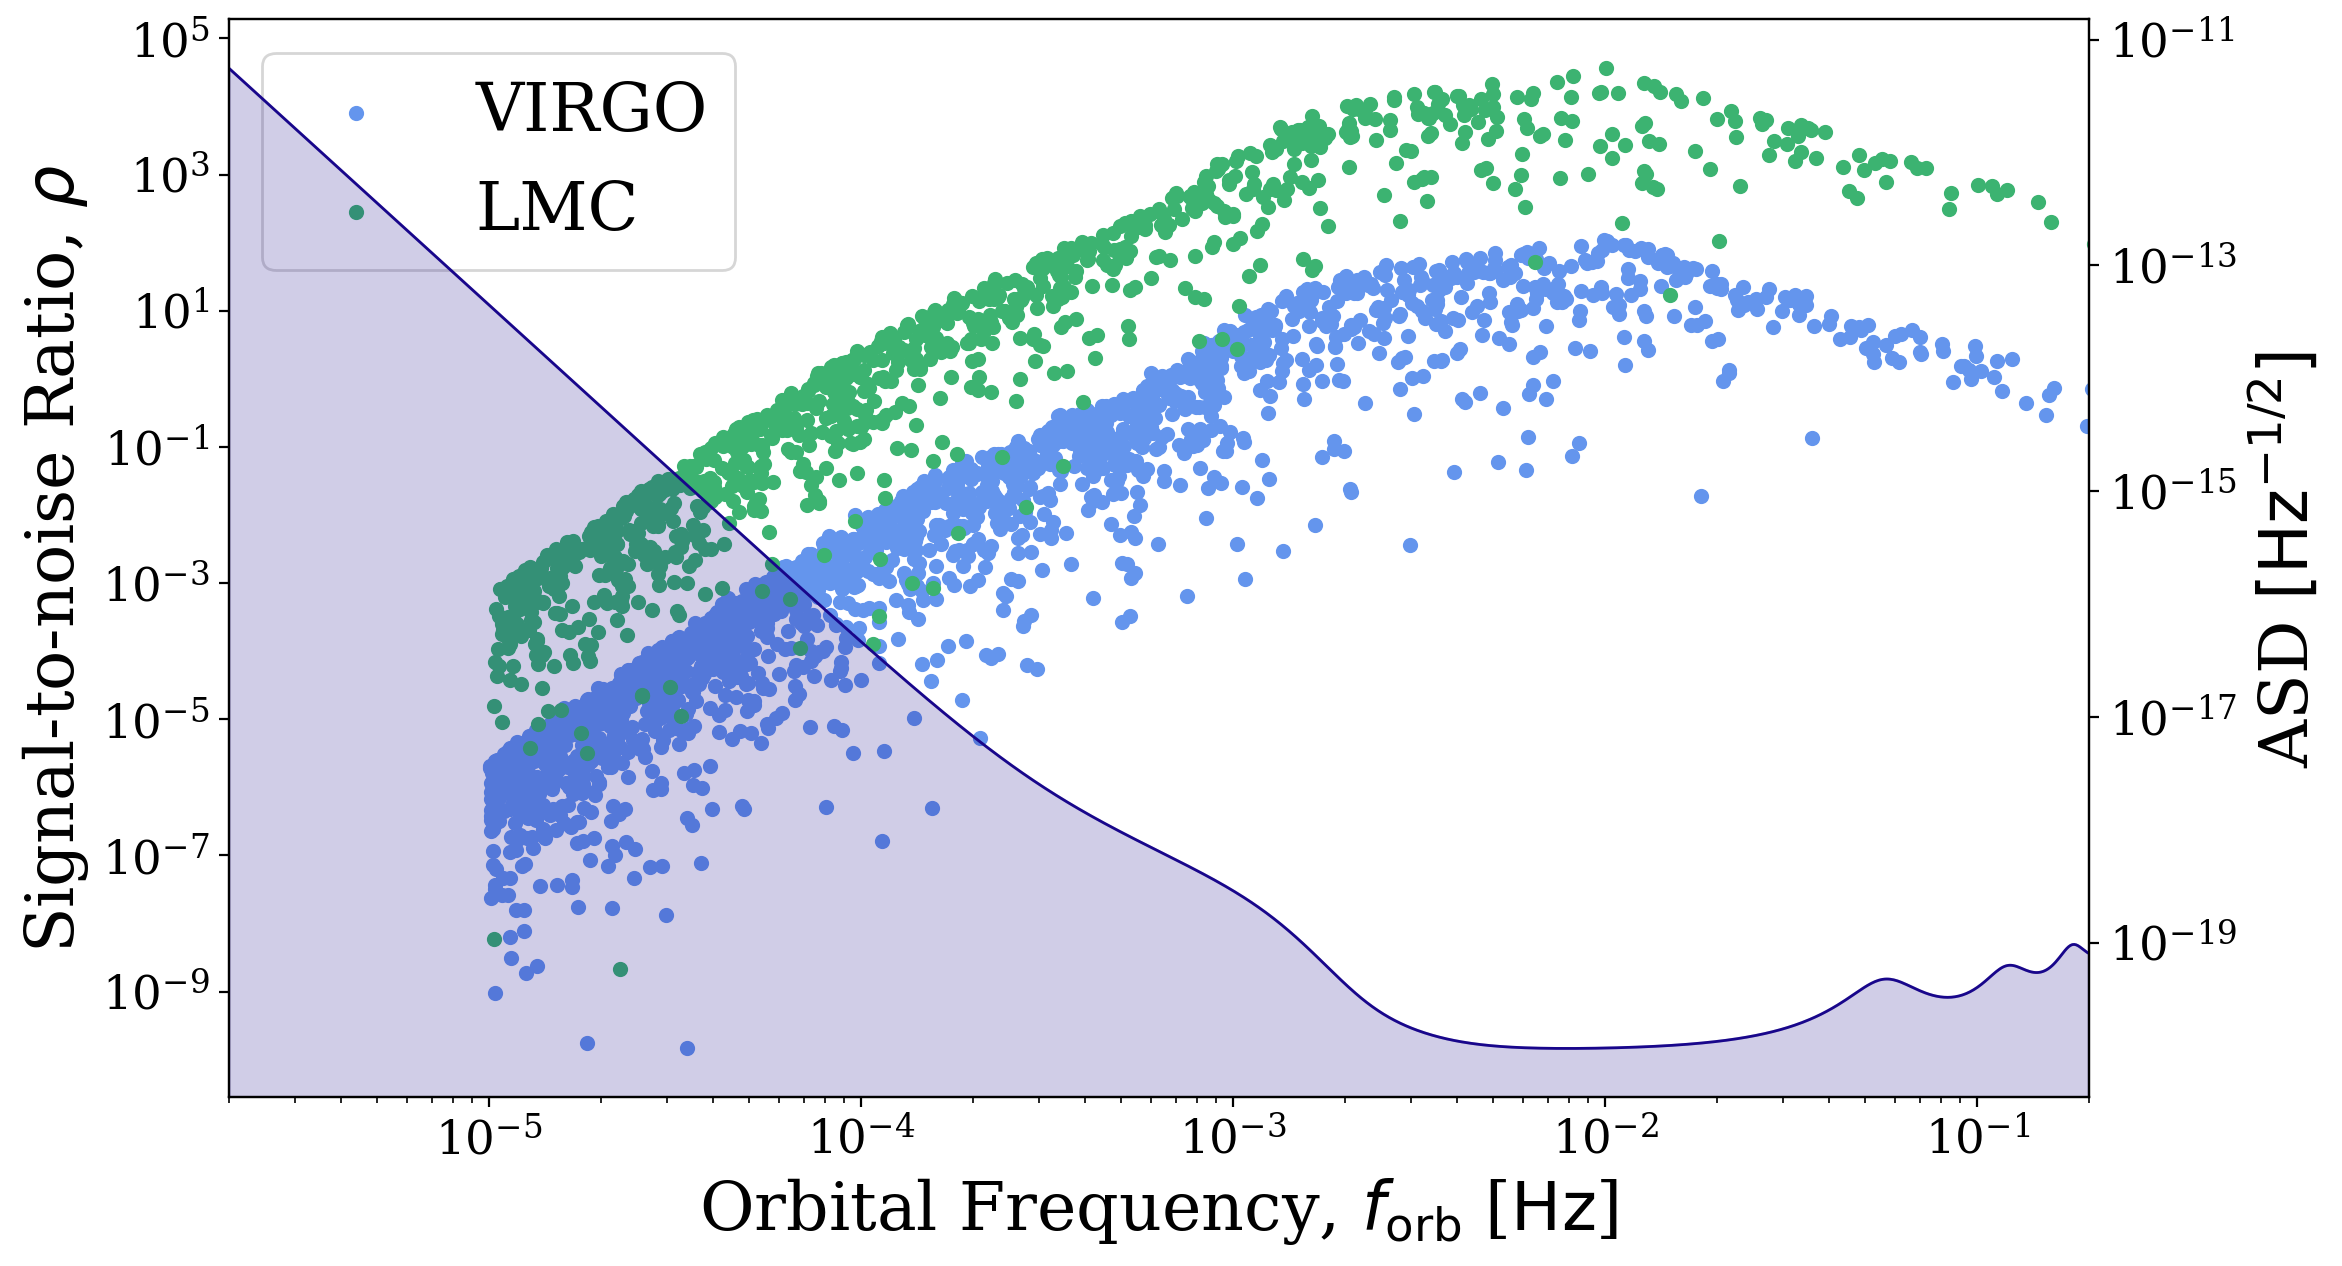

In [ ]:
"""Distance LMC"""


number_binaries = 1000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(50, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_LMC = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot=False)




"""Distance VIRGO"""


number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(16, 1.5, number_binaries) * u.Mpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_VIRGO = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot=False)

print(f"Look at the y-axis!!")


fig, ax = pop_sources_VIRGO.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, c = 'cornflowerblue', label = 'VIRGO')

fig1, ax2 = pop_sources_LMC.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, fig=fig, ax = ax, c = 'mediumseagreen', label = 'LMC')

plt.legend()



# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()




snr 1.4050775432495934e-06 1319.2976129747008
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr
snr 0.0002971479983221376 2318661.578248485
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr
Look at the y-axis and sbhb has more of a peak


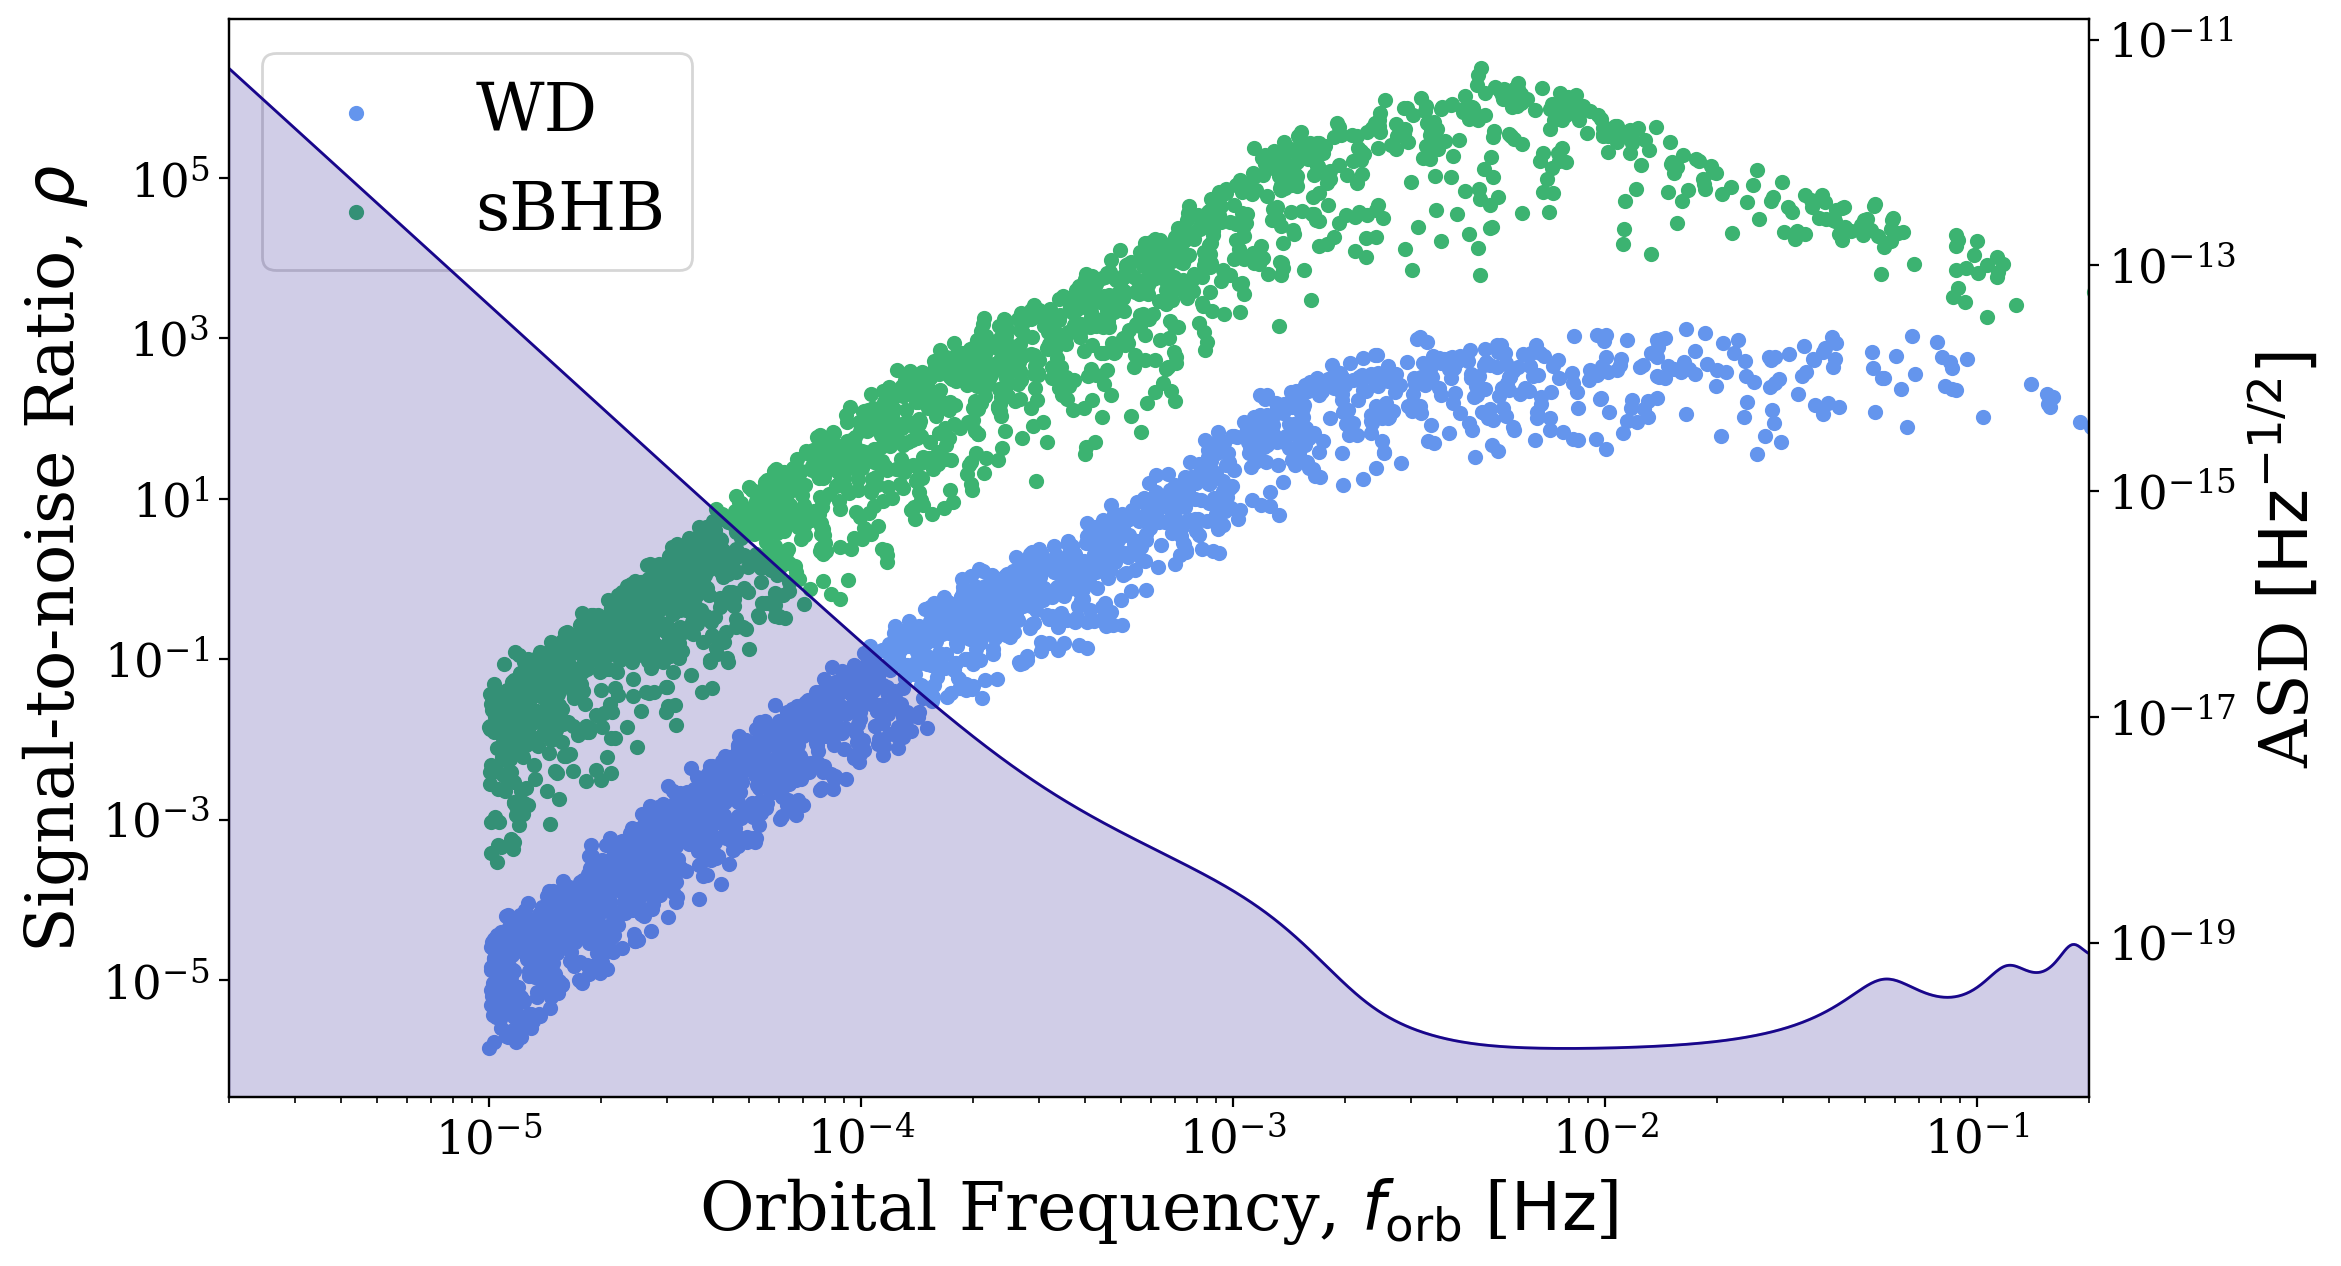

In [ ]:
"""Low mass"""

"""WD"""
number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0.2, 1.4, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_WD = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")




"""stellar mass black hole"""
number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(5, 100, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_SBHB = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")

print(f"Look at the y-axis and sbhb has more of a peak")



fig, ax = pop_sources_WD.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, c = 'cornflowerblue', label = 'WD')

fig1, ax2 = pop_sources_SBHB.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, fig=fig, ax = ax, c = 'mediumseagreen', label = 'sBHB')

plt.legend()



# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()

/usr/local/lib/python3.11/dist-packages/astropy/units/quantity.py:659: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


snr nan nan
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr
snr nan nan
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr


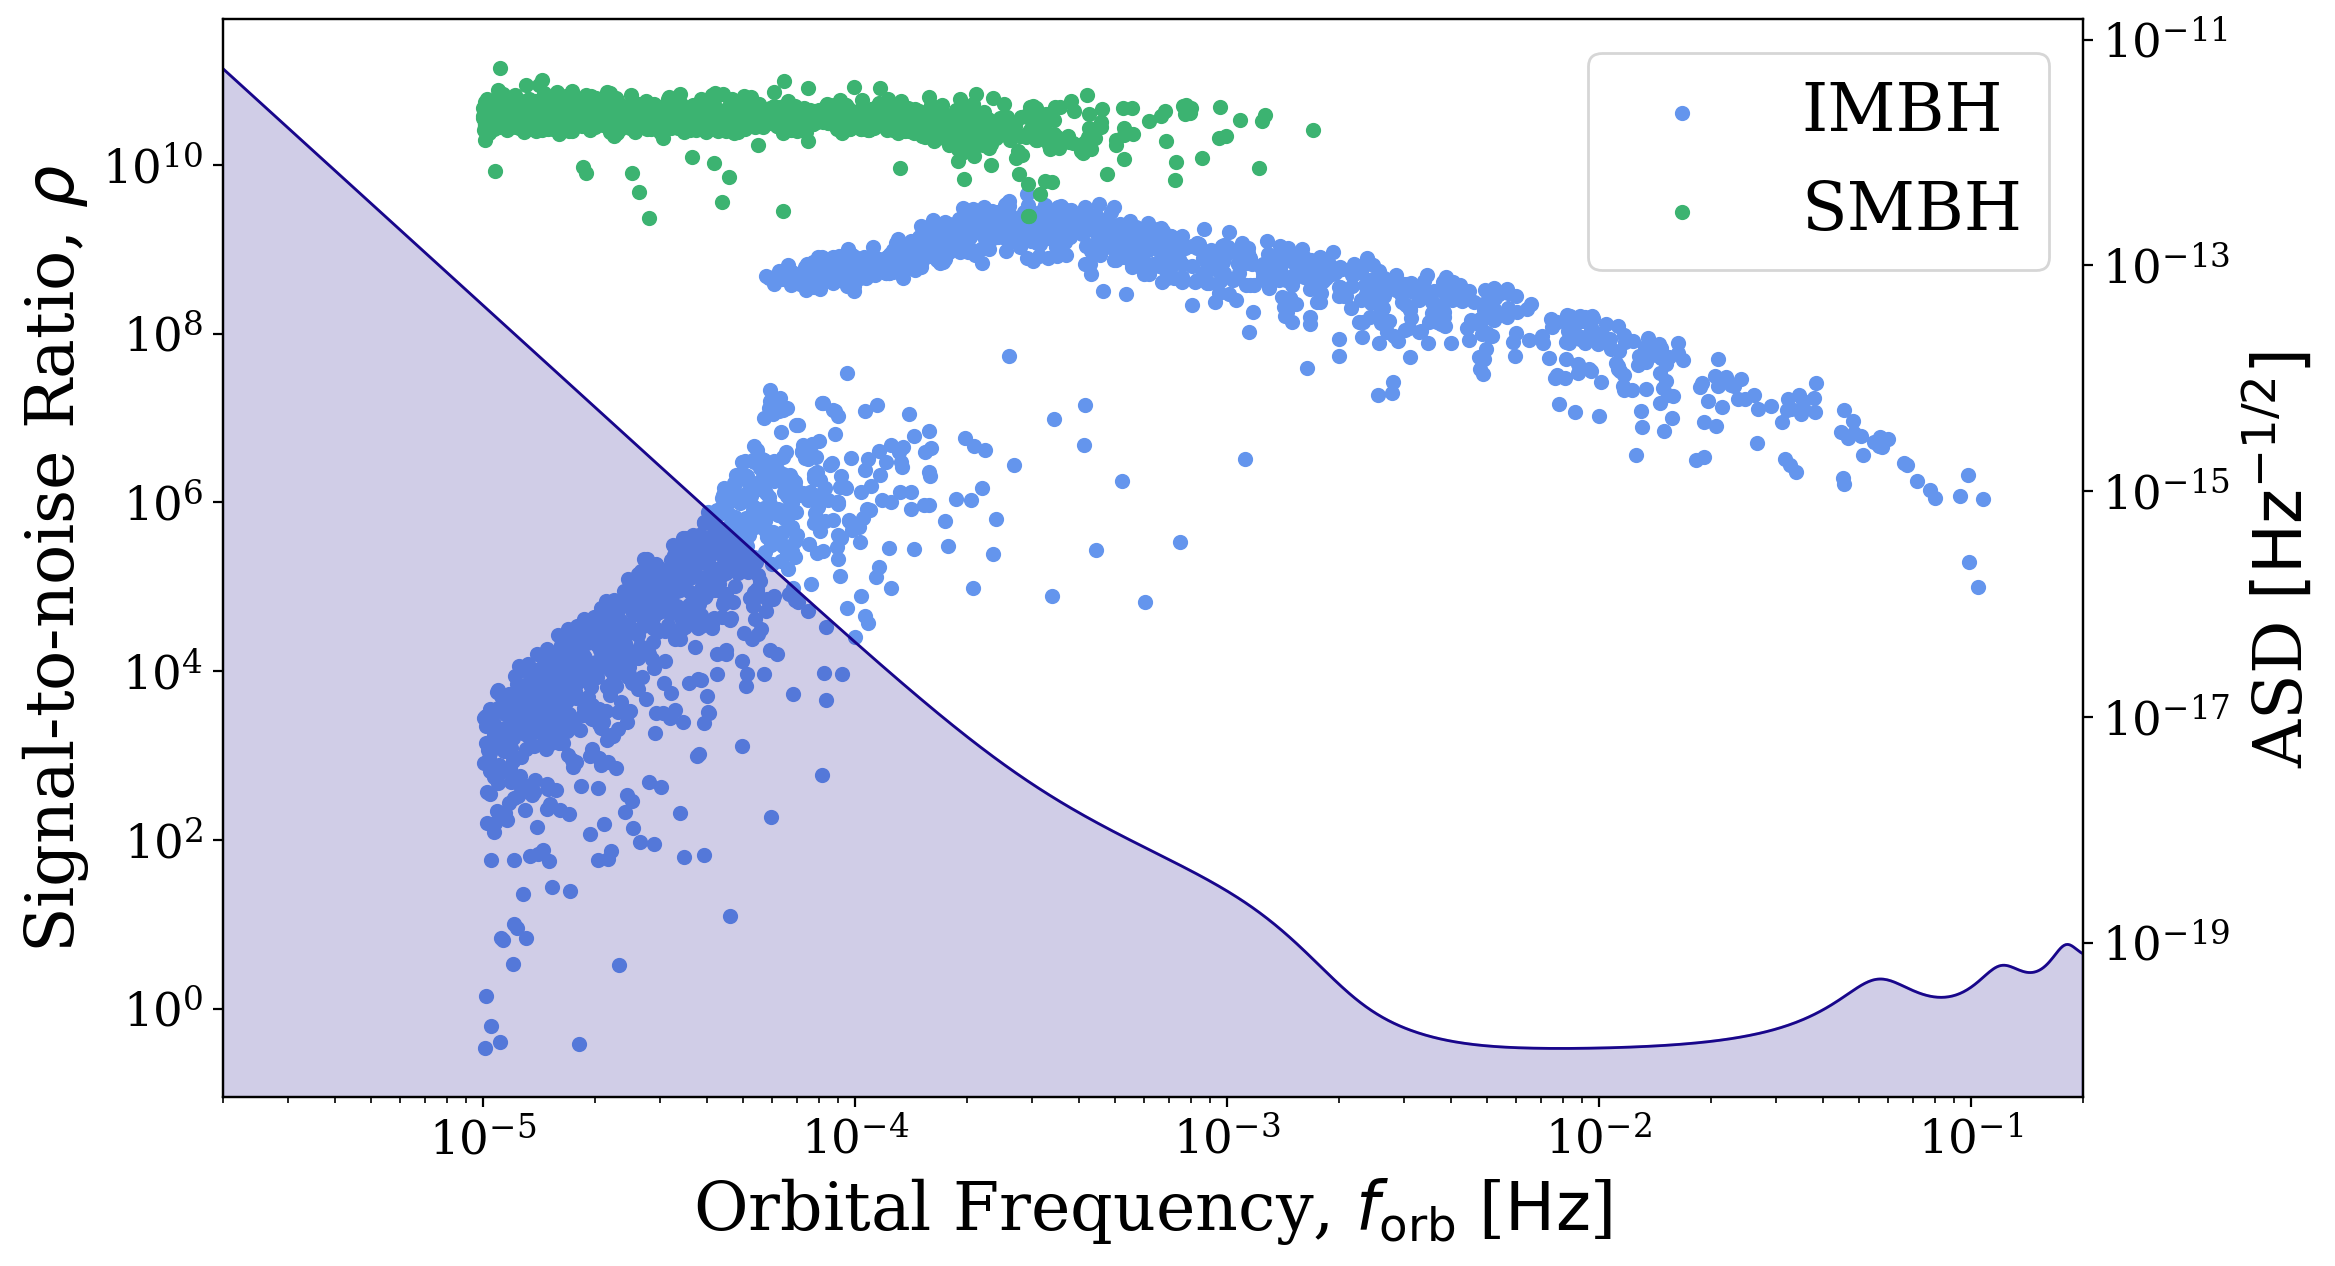

In [ ]:
"""High mass"""

"""IMBH"""
number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(100, 10**5, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_IMBHB = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")




"""SMBH"""
number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(10**6, 10**9, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.0
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_SMBHB = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")


fig, ax = pop_sources_IMBHB.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, c = 'cornflowerblue', label = 'IMBH')

fig1, ax2 = pop_sources_SMBHB.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, fig=fig, ax = ax, c = 'mediumseagreen', label = 'SMBH')

plt.legend()



# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()



snr 0.0 173572.4958773857
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr
snr 0.0 125419.253998578
Range of merger times:1.7976967673571148e-13 Gyr - 1304.4510023164262 Gyr


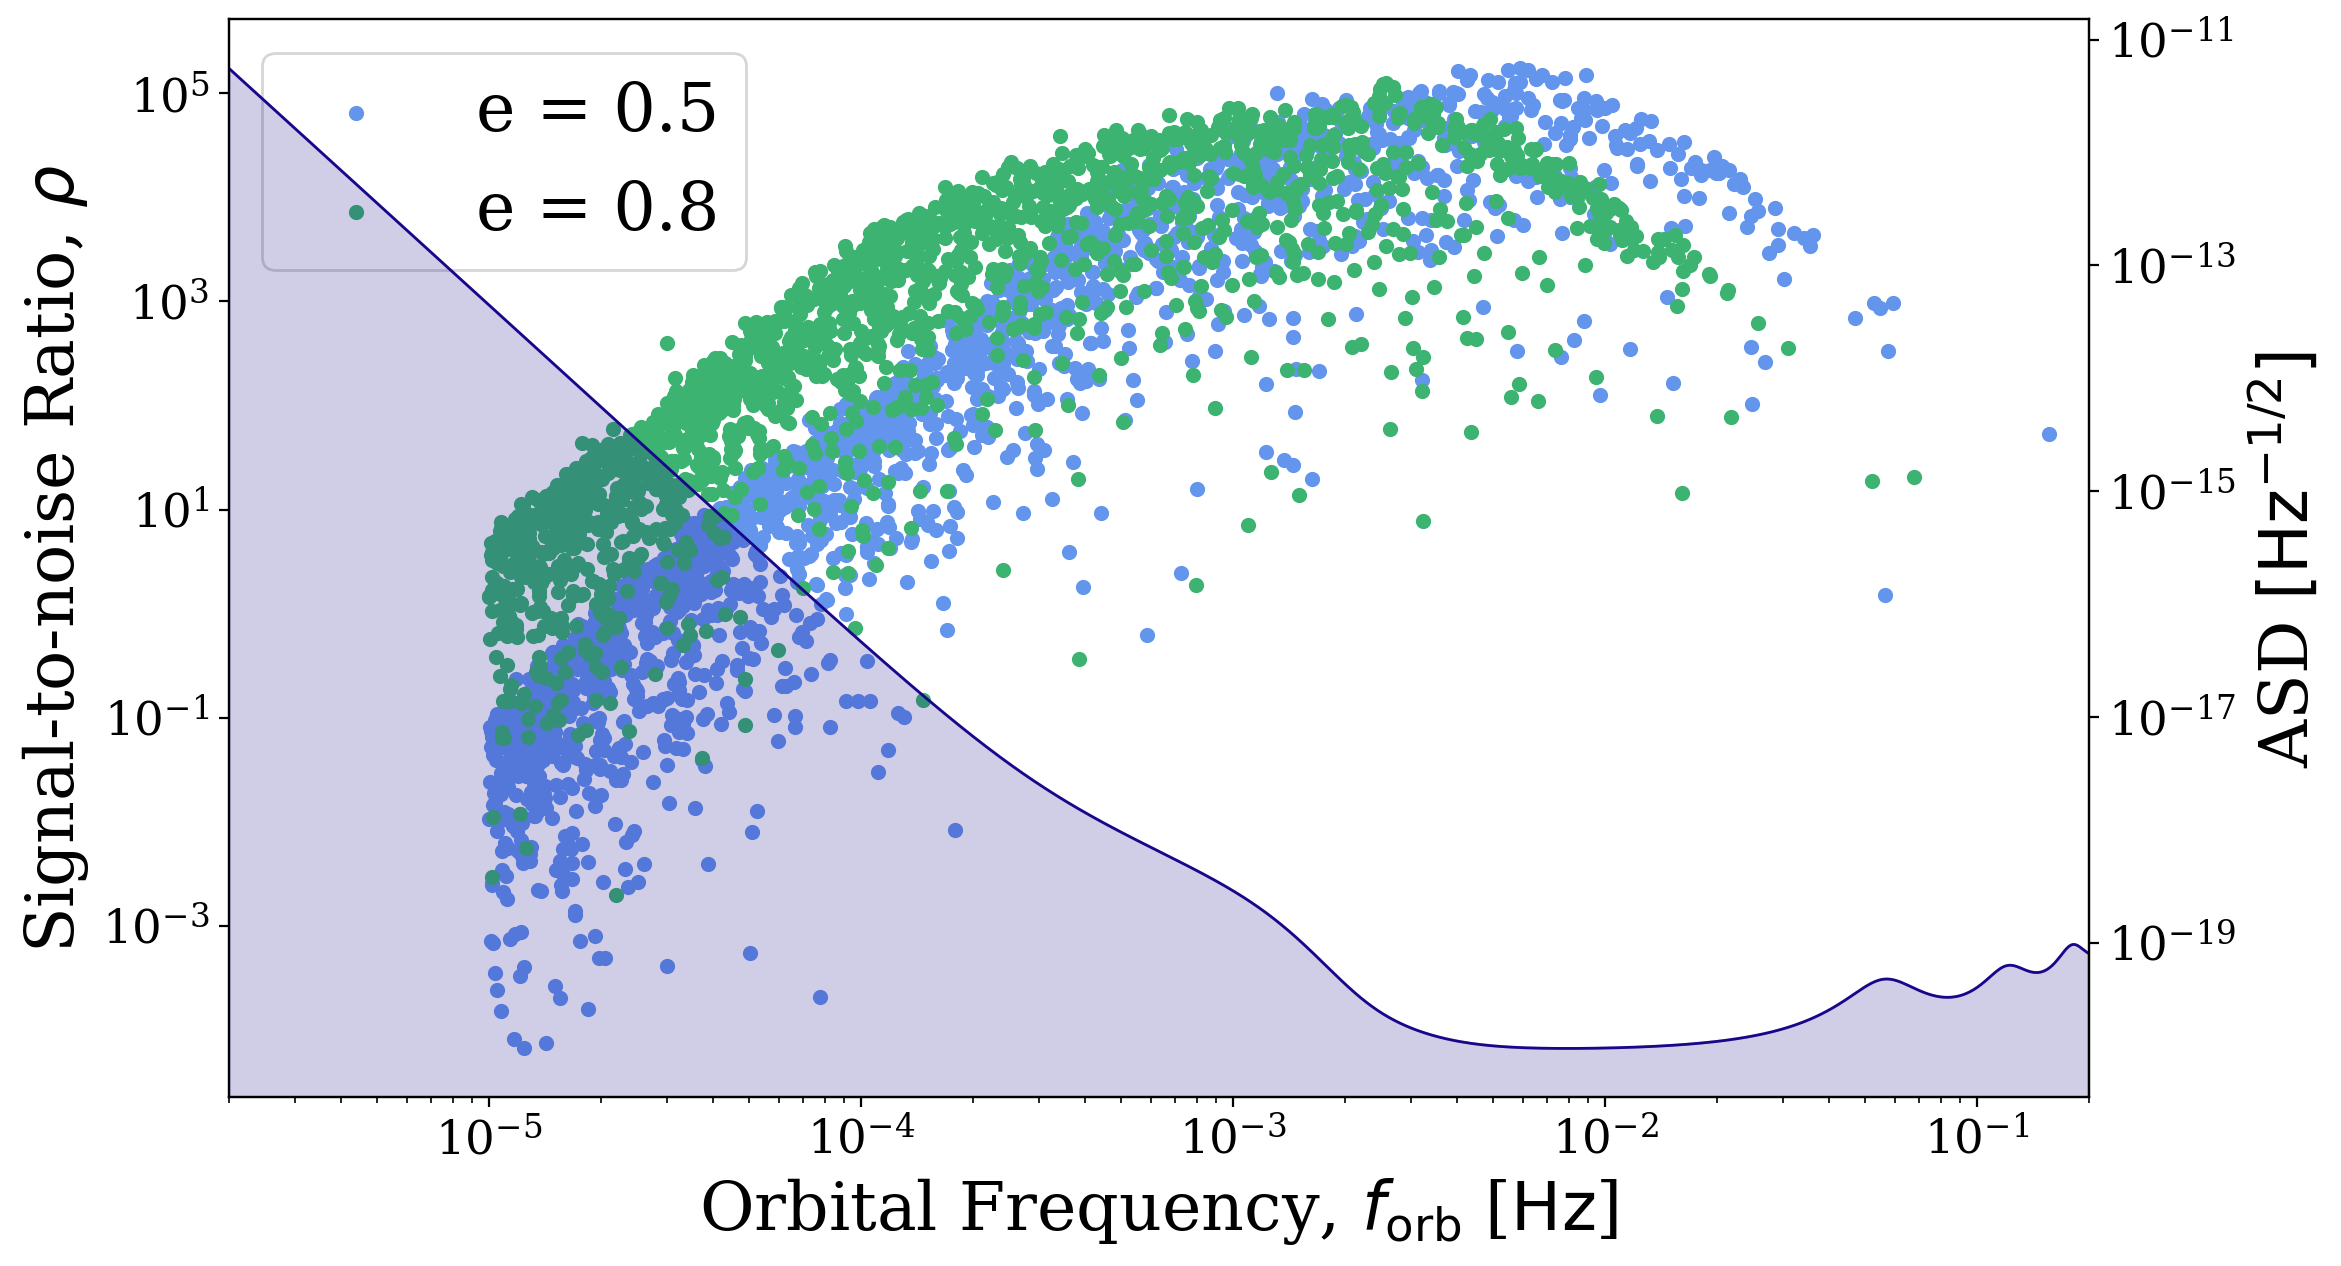

In [ ]:
"""eccentricity"""


"""e = 0.5"""

number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.5
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_05ecc = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")



"""e = 0.8"""


number_binaries = 2000 #setting the number of sources you want

# generating parameters
m_1 = np.random.uniform(0, 30, number_binaries) * u.Msun
m_2 = m_1


dist = np.random.normal(8, 1.5, number_binaries) * u.kpc


f_orb = 10**(-5 * np.random.power(3, number_binaries)) * u.Hz

e_single = 0.8
ecc = np.full(number_binaries, e_single) #getting an array of just zeros of the right shape

pop_sources_08ecc = population(mass1 = m_1, mass2= m_2, eccentricity = ecc, distance = dist, orbital_frequency = f_orb, plot = False)

print(f"Range of merger times:{pop_sources.get_merger_time().min()} - {pop_sources.get_merger_time().max()}")


#plot
fig, ax = pop_sources_05ecc.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, c = 'cornflowerblue', label = 'e = 0.5')

fig1, ax2 = pop_sources_08ecc.plot_source_variables(xstr="f_orb", ystr="snr", log_scale=(True, True),
                                        show=False, fig=fig, ax = ax, c = 'mediumseagreen', label = 'e = 0.8')

plt.legend()



# duplicate the x axis and plot the LISA sensitivity curve
right_ax = ax.twinx()
frequency_range = np.logspace(np.log10(2e-6), np.log10(2e-1), 1000) * u.Hz
lw.visualisation.plot_sensitivity_curve(frequency_range=frequency_range, fig=fig, ax=right_ax)

plt.show()



---



---


# Legwork has a lot of flexibility


There are many additional parameters you can change
such as instrument, input your custom psd(if you have one), observing time, arm lenghth and confusion noise.


Additional documentation + cool plot comparing LISA and Tianqin: [LEGWORK Comparing Sensitivity Curves](https://legwork.readthedocs.io/en/latest/demos/CompareSensitivityCurves.html)


In [ ]:
# Parameters
m1 = 30 * u.Msun
m2 = 30 * u.Msun
ecc = 0.0
f_orb = 1e-4 * u.Hz
dist = 8 * u.kpc




source = lw.source.Source(m_1=m1, m_2=m2, ecc=ecc, dist=dist, f_orb=f_orb,
                        interpolate_g=False,
                        interpolate_sc=True,
                        sc_params={
                            "instrument": "LISA",
                            "custom_psd": None,
                            "t_obs": 4 * u.yr,
                            "L": 2.5e9 * u.m,
                            "approximate_R": False,
                            "confusion_noise": 'robson19'})


print(f" SNR = {source.get_snr()}")






 SNR = [17.48274152]


### Task 4:
Lets change sc_params. How do things change?



*  What is the SNR if we are instead looking at `"TianQin"`?
*  How about if you change the arm lengths?
*  We can also change the confusion noise: `huang20`, `robson19`, `thiele21`







In [ ]:
# Parameters
m1 = 30 * u.Msun
m2 = 30 * u.Msun
ecc = 0.0
f_orb = 1e-4 * u.Hz
dist = 8 * u.kpc
# Note also remove the : at the end too
"""source = lw.source.Source(m_1=m1, m_2=m2, ecc=ecc, dist=dist, f_orb=f_orb,
                        interpolate_g=False,
                        interpolate_sc=True,
                        sc_params={
                            "instrument": "__",
                            "custom_psd": None,
                            "t_obs": __ * u.yr,
                            "L": __ * u.m,
                            "approximate_R": False,
                            "confusion_noise": '__'})""";

#print(f" SNR = {source.get_snr()}")



---


Krystal's Version



---



In [ ]:
# Parameters
m1 = 30 * u.Msun
m2 = 30 * u.Msun
ecc = 0.0
f_orb = 1e-4 * u.Hz
dist = 8 * u.kpc

source = lw.source.Source(m_1=m1, m_2=m2, ecc=ecc, dist=dist, f_orb=f_orb,
                        interpolate_g=False,
                        interpolate_sc=True,
                        sc_params={
                            "instrument": "TianQin",
                            "custom_psd": None,
                            "t_obs": 10 * u.yr,
                            "L": 2.5e9 * u.m,
                            "approximate_R": False,
                            "confusion_noise": 'robson19'})

print(f" SNR = {source.get_snr()}")

 SNR = [71.85859653]




---

---



# Bonus Section



---

##  Making your own PSDs!

[Click this link to Katie's Galactic Foreground Notebook](https://colab.research.google.com/drive/1hbMns7C2zoKvOcnD_WxdUR95emEY96gh?usp=sharing)


![Galactic Foreground](https://drive.google.com/uc?export=download&id=1bGrA10cdvngcBFWwyGNrstd6CwEr9gQ9)





## Evolving Binaries

LEGWORK also has the capability to evolve your binaries. Similar to the `source` module. The inputs are:

When evolving a binary the mandatory parameters you need are:

*    Mass1(`m_1`), Mass 2(`m_2`) or `beta`
*    Eccentricity: `ecc`
*   Semi-major axis, `a` or `f_orb`

<br/>


This also has a flexible output, you can specify if you want:
* semi -major axis evolution:`a_evol`
* orbital frequency evolution: `f_orb`
* gravitational wave frequency evolution: `f_gw`
* timesteps: `timesteps`

Plus additional outputs if you use `evol_ecc` instead of `evol_circ`

More in depth look:[LEGWORK `evol` module](https://legwork.readthedocs.io/en/latest/notebooks/Evolution.html)


In [ ]:
m_1 = 30 * u.Msun
m_2 = 30 * u.Msun
f_orb_i = 1e-4 * u.Hz

nsteps = 10_000 #how many steps

#merger time
t_merge = lw.evol.get_t_merge_circ(m_1=m_1, m_2=m_2, f_orb_i=f_orb_i).to(u.yr)


#evolve binary to merger and tracking orbital frequency
# you can change output_vars to be what you want i.e
f_orb_evol, t = lw.evol.evol_circ(t_evol=t_merge, n_step=nsteps, m_1=m_1, m_2=m_2, f_orb_i=f_orb_i,
                                         output_vars=["f_orb", "timesteps"])

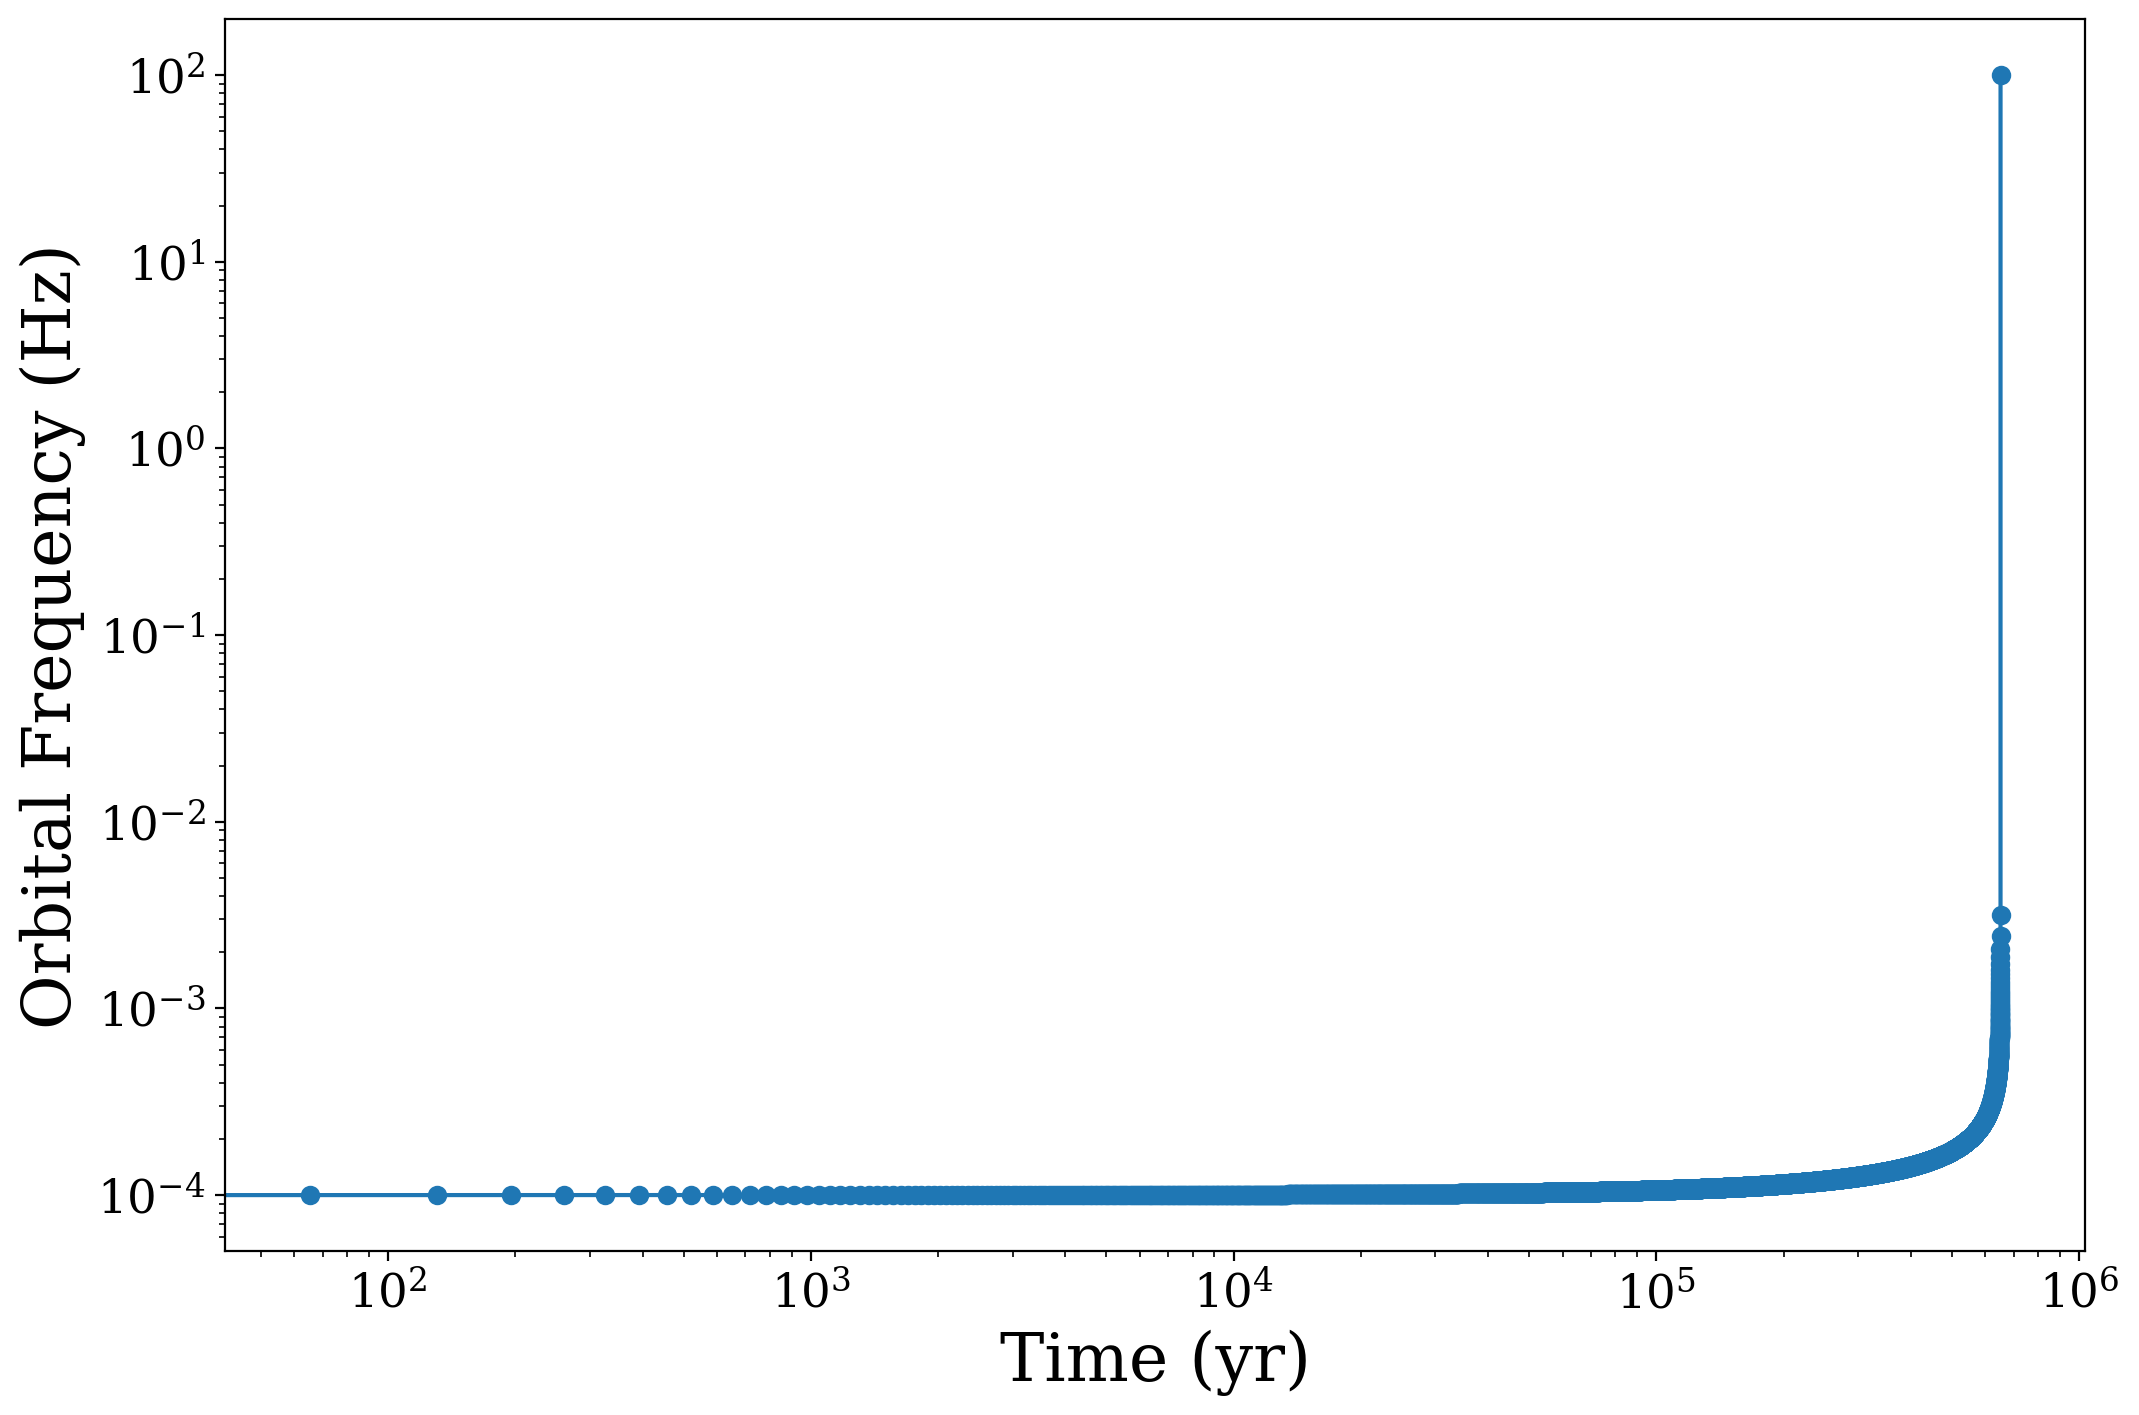

In [ ]:
plt.loglog(t, f_orb_evol, marker = 'o')
plt.xlabel("Time (yr)")
plt.ylabel("Orbital Frequency (Hz)")
plt.show()

LEGWORK automatically chooses timesteps, but can be specified with `timesteps` in the evolution functions.

Highlighting some work of Tom Wagg's code from: [LEGWORK `evol` module](https://legwork.readthedocs.io/en/latest/notebooks/Evolution.html) on evolving eccentric and circular binaries within LEGWORK

**Change `t_evolve` to see how the plot changes(10 yrs vs 10 Myr vs 500 Myr)**

Completed evolution of 2500 binaries for 10 Myr
66.8% of binaries merged


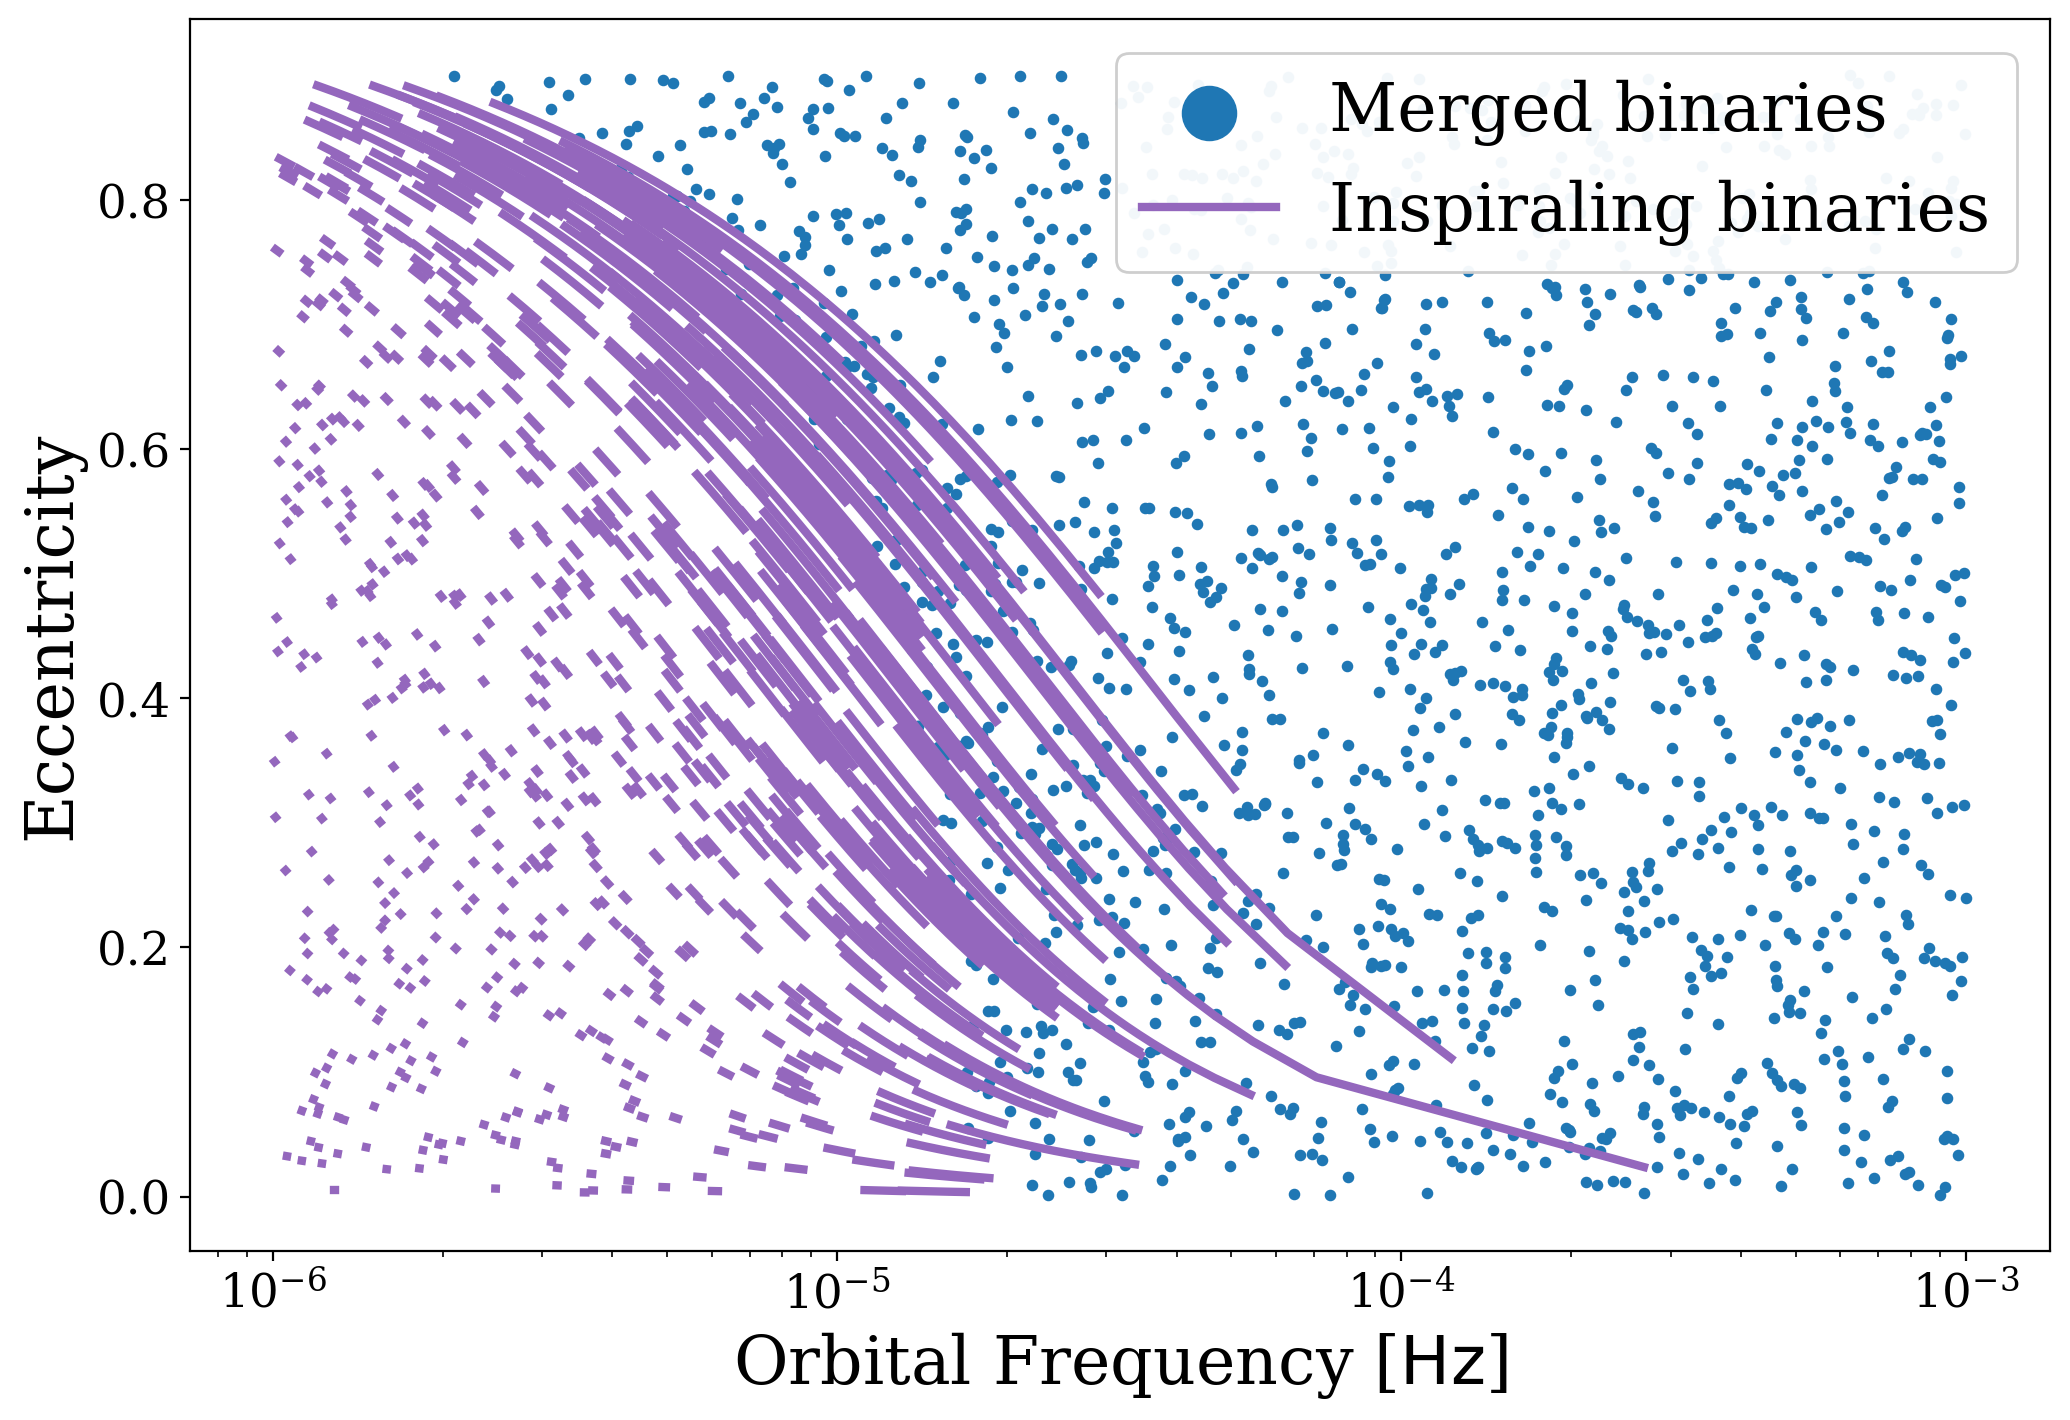

In [ ]:
# create some random binaries with the same masses

t_evolve = 10 * u.yr
m1_play = 30
m2_play = 15


n_binaries = 2500

m_1 = np.repeat(m1_play, n_binaries) * u.Msun
m_2 = np.repeat(m2_play, n_binaries) * m_1
f_orb_i = 10**(np.random.uniform(-6, -3, n_binaries)) * u.Hz
ecc_i = np.random.uniform(0, 0.9, n_binaries)

#timesteps
timesteps = (np.logspace(-2, 7, 1000) * u.yr).to(u.Myr)

# check which binaries will merge during that time
t_merge = lw.evol.get_t_merge_ecc(ecc_i=ecc_i, m_1=m_1, m_2=m_2, f_orb_i=f_orb_i)
merged = t_merge <= timesteps[-1]
inspiral = np.logical_not(merged)

# evolve the binaries that won't merge
ecc_evol, f_orb_evol = lw.evol.evol_ecc(ecc_i=ecc_i[inspiral], m_1=m_1[inspiral], m_2=m_2[inspiral],
                                     f_orb_i=f_orb_i[inspiral], timesteps=timesteps, t_before= t_evolve)

print("Completed evolution of {} binaries".format(n_binaries), end="")
print(r" for {:1.0f} {}".format(timesteps[-1].value, timesteps.unit))

# create a plot
fig, ax = plt.subplots()

# check which binaries merged
print("{:1.1f}% of binaries merged".format(len(ecc_i[merged]) / n_binaries * 100))

# plot the merged binaries as scatter points
ax.scatter(f_orb_i[merged], ecc_i[merged], label="Merged binaries", s=10)

# plot the inspiraling line by connecting lines from their start to their end
for i in range(len(ecc_evol)):
    label = "Inspiraling binaries" if i == 0 else ""
    mask = f_orb_evol[i] != 1e2 * u.Hz
    ax.plot(f_orb_evol[i][mask], ecc_evol[i][mask], color="tab:purple", lw=3, label=label)

ax.legend(loc="upper right", framealpha=0.95, markerscale=6)

ax.set_xscale("log")

ax.set_xlabel("Orbital Frequency [{:latex}]".format(f_orb_evol.unit))
ax.set_ylabel("Eccentricity")

plt.show()

# can see circulization from GW